# Supervised Learning (Classification)
**Pemateri :**
*   Ade Satya Wahana
*   Ibnu Pujiono

Ministry of Finance - Data Analytics Community

In [1]:
# install library yang mungkin belum tersedia
!pip install fast_ml
!pip install XGBoost
# !pip install plotly

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)


In [ ]:
# jika menggunakan google colab dan butuh upload file csv
# from google.colab import files
# files.upload()

Import Library dan Data

In [2]:
# standard ML library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,8)})

# tambahan
import plotly.express as px

# Preprocess
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

# Tuning
from sklearn.model_selection import validation_curve, LeaveOneOut, train_test_split, cross_val_score, KFold, cross_validate, GridSearchCV
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, SelectFromModel
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from fast_ml.model_development import train_valid_test_split

# models
from sklearn.linear_model import LogisticRegression, Perceptron, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

## Traditional Programming vs Machine Learning
### Data

In [3]:
x = [[1,0],[2,1],[3,2],[4,3],[5,4],[6,5],[7,6]]
y = [2,5,8,11,14,17,20]

xtrain = np.array(x)
ytrain = np.array(y)

In [4]:
xtrain

array([[1, 0],
       [2, 1],
       [3, 2],
       [4, 3],
       [5, 4],
       [6, 5],
       [7, 6]])

### Programming

In [7]:
def hitung(x1,x2):
    y = 2*x1+x2
    return y

hitung(3,8)

14

### Machine Learning

In [8]:
model = LinearRegression()
model.fit(xtrain, ytrain)

model.coef_

array([1.5, 1.5])

In [9]:
model.predict(np.array([[3,8]]))

array([17.])

<function matplotlib.pyplot.show(close=None, block=None)>

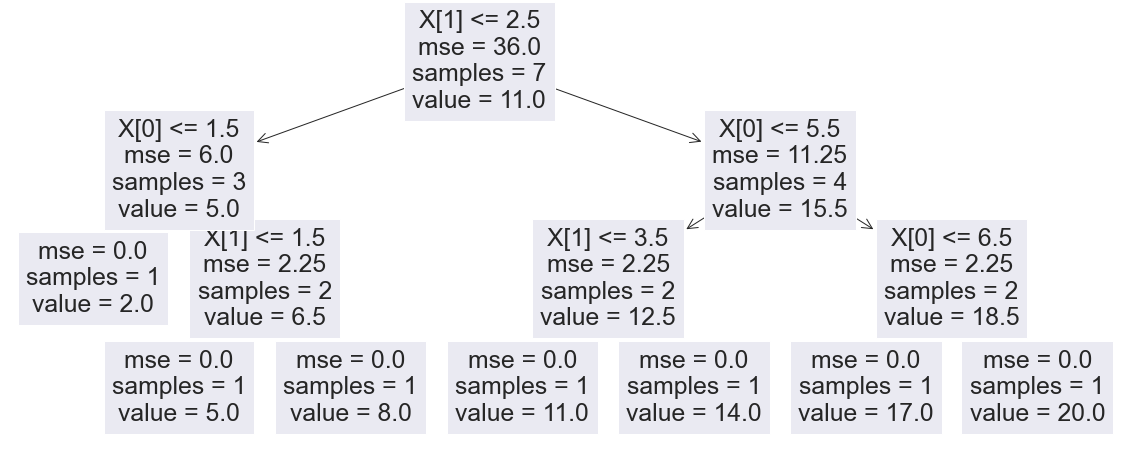

In [19]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as tree

model_dt = DecisionTreeRegressor()
model_dt.fit(xtrain, ytrain)

tree.plot_tree(model_dt)
plt.show

## Data Titanic
akan digunakan sepanjang notebook ini

In [20]:
file = "https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/05.%20Basic%20Machine%20Learning/titanic_clean.csv"

data = pd.read_csv(file)

Melihat data

In [21]:
data.head()
# data.tail()

,Survived,Pclass,Age_mean_multi,SibSp,Parch,Fare_dbscan,Sex_enc,S,C,Q,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
0,0,3,22.0,1,0,7.2500,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,3,35.0,0,0,8.0500,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


|Variable|Description|
|--- |--- |
|PassengerId|Id of passenger|
|Survived|Survival (0 = No; 1 = Yes)|
|Pclass|Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
|Name|Name|
|Sex|Sex|
|Age|Age|
|SibSp|Number of Siblings/Spouses Aboard|
|Parch|Number of Parents/Children Aboard|
|Ticket|Ticket Number|
|Fare|Passenger Fare (British pound)|
|Cabin|Cabin|
|Embarked|Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

Melihat Informasi Data

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Age_mean_multi  891 non-null    float64
 3   SibSp           891 non-null    int64  
 4   Parch           891 non-null    int64  
 5   Fare_dbscan     891 non-null    float64
 6   Sex_enc         891 non-null    int64  
 7   S               891 non-null    float64
 8   C               891 non-null    float64
 9   Q               891 non-null    float64
 10  Mr              891 non-null    float64
 11  Mrs             891 non-null    float64
 12  Miss            891 non-null    float64
 13  Master          891 non-null    float64
 14  Other           891 non-null    float64
 15  young_adult     891 non-null    float64
 16  adult           891 non-null    float64
 17  elderly         891 non-null    flo

Penjelasan kolom data :
- Survived : Survival (1 : yes, 0 : no)
- Pclass : Passenger Class ( 1 : 1st, 2 : 2nd, 3 : 3rd)
- Age_mean_multi : Umur penumpang (hasil dari imputasi)
- Sibsp : Number of siblings/spouse abroad
- Parch : Number of parents/children abroad
- Fare_dbscan : Passenger Fare (British Pound) - hasil dari imputasi berdasarkan keberangkatan
- Sex_enc : jenis kelamin - hasil dari labelling
- S , C , Q : keberangkatan (hasil dari encoding "Embarked")
- Mr, Mrs, Miss, Master, Other : Inisial nama (hasil dari encoding "Initial")
- young_adult, adult, elderly, child : Kelompok Umur (hasil dari feature engineering "Age")

In [23]:
data.describe()

,Survived,Pclass,Age_mean_multi,SibSp,Parch,Fare_dbscan,Sex_enc,S,C,Q,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.736034,0.523008,0.381594,30.653366,0.352413,0.188552,0.086420,0.725028,0.044893,0.208754,0.593715,0.142536,0.010101,0.270483,0.093154,0.071829,0.564534
std,0.486592,0.836071,13.014897,1.102743,0.806057,41.125179,0.477990,0.391372,0.281141,0.446751,0.207186,0.406647,0.491415,0.349796,0.100051,0.444459,0.290811,0.258350,0.496096
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


0    549
1    342
Name: Survived, dtype: int64


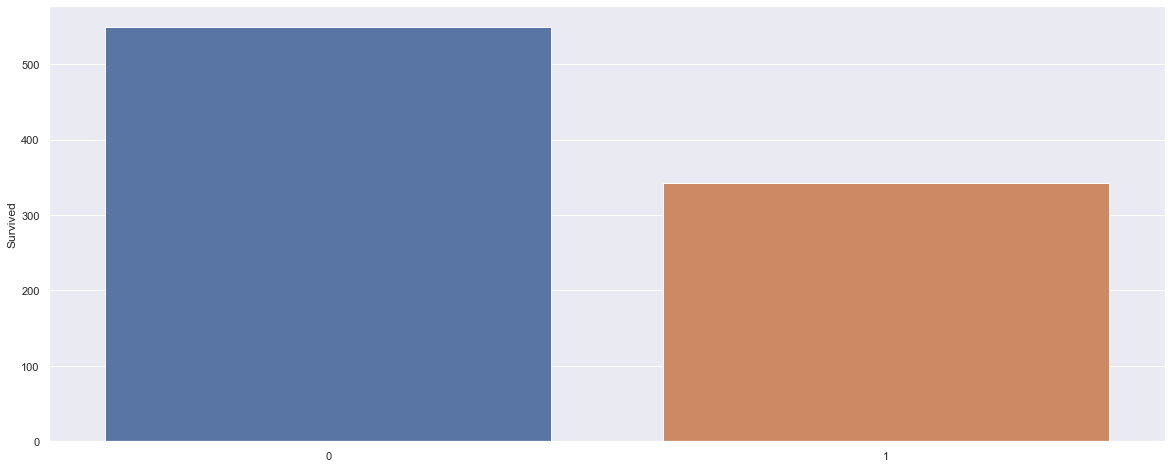

In [24]:
sns.barplot(x=data['Survived'].value_counts().index, y=data['Survived'].value_counts())
print(data['Survived'].value_counts())

Dari data target dapat dilihat jika penumpang yang "Survived" sebanyak 342 orang dan yang tidak sebanyak 549 orang

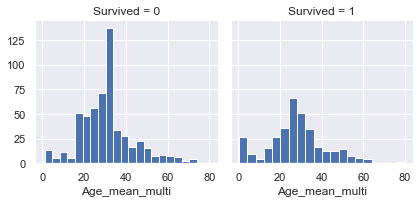

In [25]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age_mean_multi', bins=20)

Melihat Korelasi antar variabel

Text(0.5, 1.0, 'Correlation Heatmap Titanic')

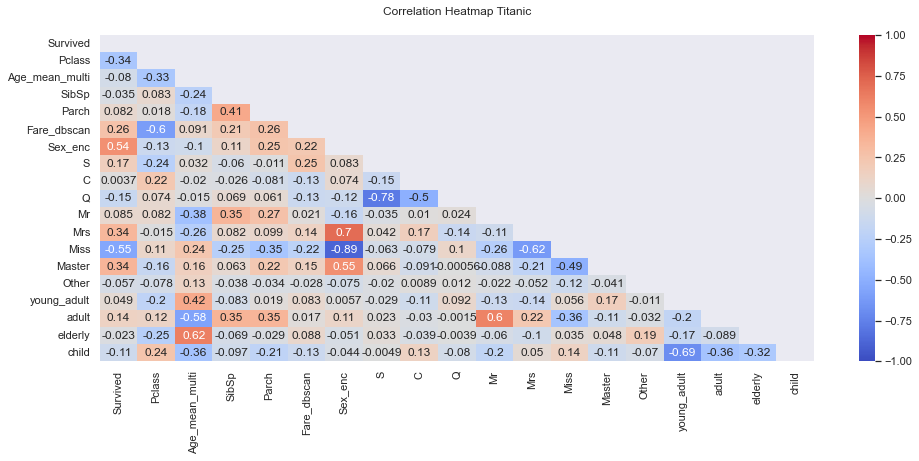

In [26]:
plt.figure(figsize=(16, 6))
matrix = np.triu(data.corr())
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap='coolwarm',mask = matrix)
heatmap.set_title('Correlation Heatmap Titanic', fontdict={'fontsize':12}, pad=20)

# Fitting The Model

Membagi data menjadi "data feature" dan "data target"

In [27]:
X = data.drop('Survived',axis=1) #data feature
y = data['Survived'] # data target
print(X.shape)
print(y.shape)

(891, 18)
(891,)


In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Proses fit model adalah proses yang dijalankan untuk menjalankan proses pembelajaran algoritma model kita terhadap data latih.

In [29]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [32]:
model.predict(X.loc[1:10])

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

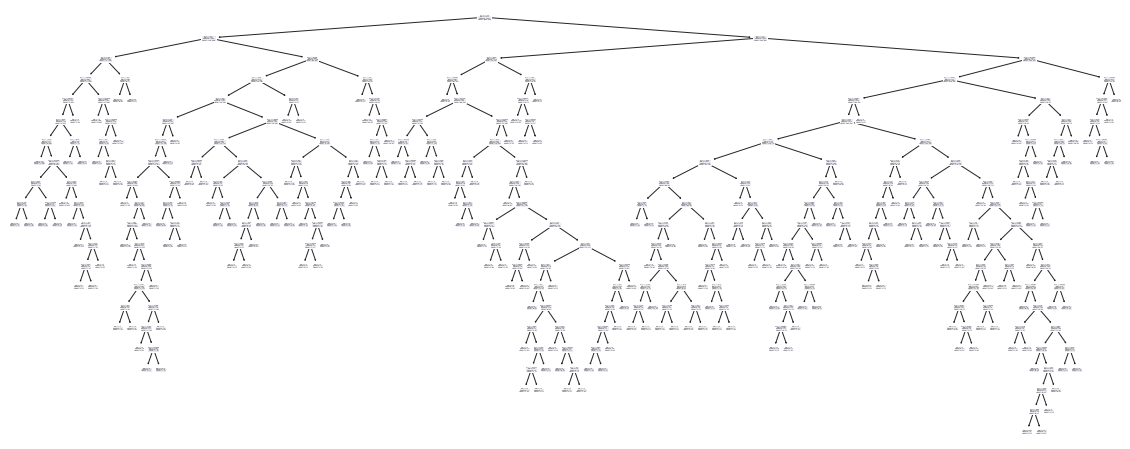

In [35]:
tree.plot_tree(model)
plt.show()

In [30]:
print ("Nilai koefisien model adalah :", model.coef_)
print ("Nilai intercept model adalah :", model.intercept_)

Nilai koefisien model adalah : [[-0.99656582 -0.01822246 -0.52209062 -0.33663258  0.00223002  1.43960582
   0.74259323  0.51187078  0.23339301  1.68439691  0.29127615 -1.06409197
   1.05577107 -0.47949513  0.4492061   0.96613328 -0.18614953  0.25866717]]
Nilai intercept model adalah : [1.6561576]


In [31]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

Model-model Classification pada sklearn biasanya diakhiri dengan istilah classifier, sedangkan model regresi diakhiri dengan istilah regressor

https://scikit-learn.org/stable/supervised_learning.html

# Model Evaluation

## Classification Scoring/Metric

### Confusion Matrix

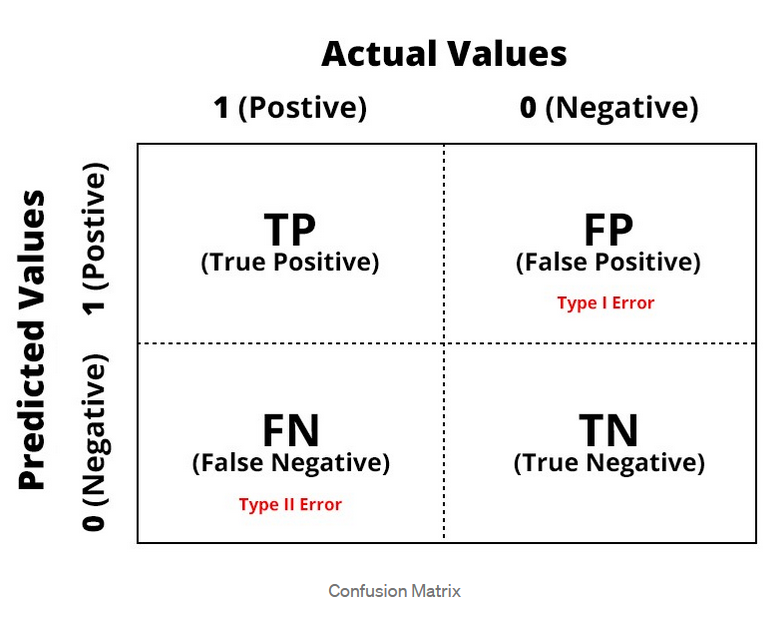


*   Accuracy = (TP+TN) / (TP+FP+FN+TN)
: menggambarkan seberapa akurat model dalam mengklasifikasikan dengan benar
*   Precision = (TP) / (TP + FP)
: menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.
*   Recall  = TP / (TP + FN)
: menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi
*   F-1 Score  = (2 * Recall * Precision) / (Recall + Precision)
: menggambarkan perbandingan rata-rata precision dan recall yang dibobotkan
*   Support  = jumlah kemunculan aktual dari kelas dari sebuah dataset










- Accuracy Score lebih tepat digunakan untuk data yang cenderung "balance". Keuntungan tambahan adalah memudahkan penjelasan kepada stakeholder mengenai performa model. Accuracy score juga dapat digunakan ketika data feature dianggap penting semua.
- F1-score dapat digunakan pada permodelan klasifikasi biner (binary classification) dan ketika dataset yang digunakan cenderung imbalance.
- ROC-AUC score lebih tepat digunakan jika kita cenderung ingin melihat ranking prediksi dan tidak disarankan digunakan pada data yang imbalance.

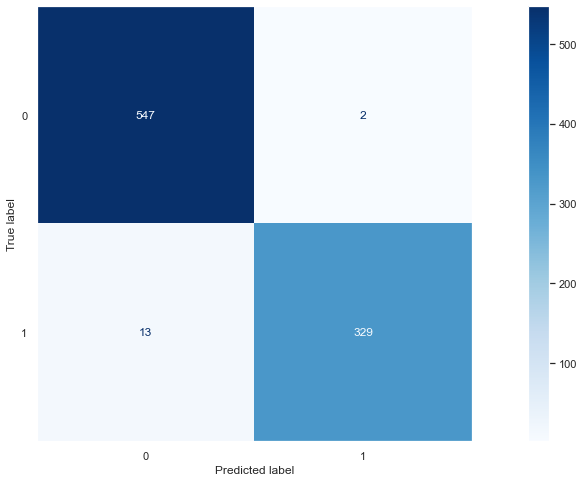

In [38]:
# menggunakan model logress sebelumnya untuk memprediksi
predict = model.predict(X)

cm_test = confusion_matrix(y, predict, labels=model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp_test.plot(cmap='Blues').ax_.grid()

In [37]:
#Classification Report
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.99      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [38]:
480+87

567

### ROC_AUC

In [35]:
score_test = roc_auc_score(y, predict)
display(score_test)

0.8099654874892148

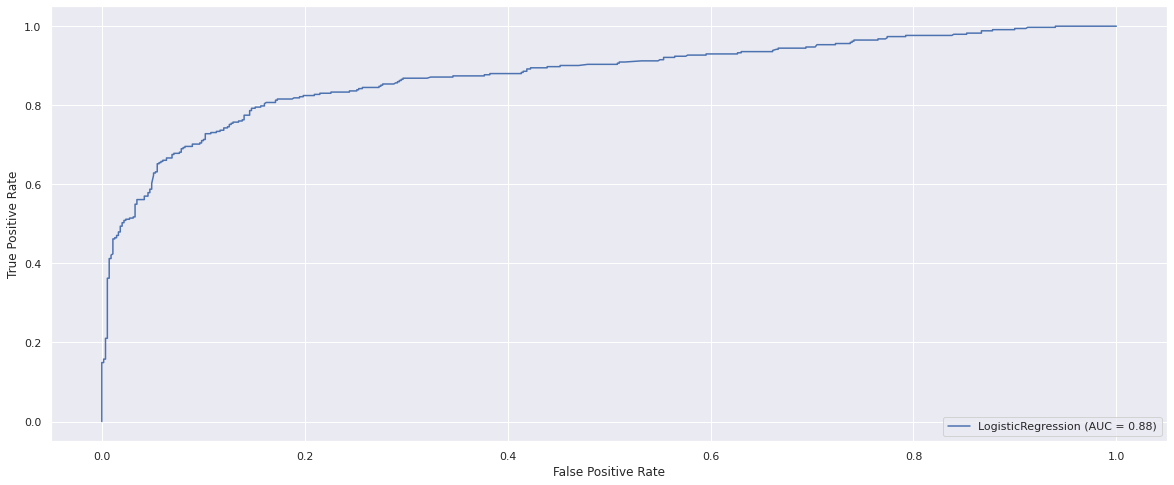

In [36]:
y_score = model.decision_function(X)

fpr, tpr, _ = roc_curve(y, y_score, pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, estimator_name= type(model).__name__).plot()

Kriteria memilih model dengan ROC curve
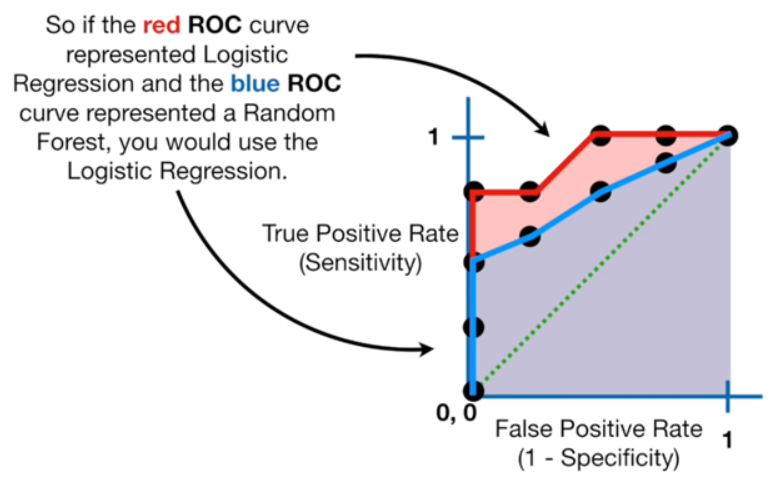

## Regression Scoring/Matrix

### R2 / Adj R2

R-squared (R2) adalah ukuran statistik yang merepresentasikan proporsi variasi (variance) variable dependen yang dapat dijelaskan oleh variable-variable yang ada pada model regresi. Adj R2 menambahkan penalty atas jumlah variable independent yang digunakan pada model.

R2 sebenarnya lebih sering digunakan untuk menilai kualitas model regresi daripada membandingkan antar model. Hal ini dikarenakan bahwa R2 lebih menggambarkan pergerakan variable dependend berdasarkan pergerakan atas variable-variable independent nya.

Pada sklearn, pengukuran score ini dapat menggunakan fungsi **'sklearn.metrics.r2_score'**

### Mean Squared Error (MSE) / Root Mean Squared Error (RMSE)

MSE dan RMSE yang paling sering digunakan untuk mengukur dan membandingkan performa model regresi. Perbedaan utama MSE dan RMSE adalah unit error yang dihasilkan. MSE menghasilkan unit error yang merupakan **pangkat 2** dari unit variable target, sedangkan RMSE menghasilkan unit error yang **sama** dengan unit variable target. Misalnya variable target menggunakan unit nilai rupiah, error yang dihasilkan MSE adalah (Nilai rupiah)$^2$, dan RMSE menghasilkan unit error nilai rupiah.

Metrik ini menghasilkan nilai yang semakin tinggi jika model memiliki error yang tinggi karena sifat quadratic dari perhitungan squared. Hal ini menghasilkan penilaian performa yang lebih sensitif terhadap nilai error yang tinggi.

Pada sklearn, pengukuran score MSE dapat menggunakan fungsi '**sklearn.metrics.mean_squared_error**', sedangkan RMSE tinggal mengubah attribute input 'squared' pada fungsi itu menjadi false.

![rmse](https://machinelearningmastery.com/wp-content/uploads/2020/12/Line-Plot-of-the-Increase-Square-Error-with-Predictions.png)

### Mean Absolute Error (MAE)

MAE juga merupakan salah satu metrik performa regresi yang biasa digunakan. Ukuran error yang dihasilkan metrik ini **sama** dengan ukuran dari variable target modelnya. Jika model memprediksi nilai rupiah, error yg dinilai pada MAE merupakan unit nilai rupiah juga. Berbeda dengan RMSE/MSE yang bersifat quadratik, perubahan nilai score pada MAE bersifat **linear** sehingga lebih intuitive untuk dijelaskan.

Pada sklearn, pengukuran score ini dapat menggunakan fungsi **'sklearn.metrics.mean_absolute_error'**

![mae](https://machinelearningmastery.com/wp-content/uploads/2020/12/Line-Plot-of-the-Increase-Absolute-Error-with-Predictions.png)

Baik MSE, RMSE, dan MAE menghasilkan nilai error yang relatif atas unit variable target sehingga penentuan baik atau tidaknya model pun **relatif** terhadap unit variable target. Nilai paling baik atas metrik-metrik ini adalah 0 yang menandakan semua prediksi model tepat dengan nilai sebenarnya dan itu **sangat amat jarang terjadi**.

Best Practice nya adalah membuat **score benchmark** dulu sebelum membandingakan nilai error model. Salah satu pendekatan untuk membuat score benchmark adalah dengan memprediksi semua baris dengan **nilai rata-rata variable target**. Model yang menghasilkan score lebih baik (kecil) dibanding benchmark dapat disimpulkan memiliki performa yang baik.

### Mean Absolute Percentace Error (MAPE)

MAPE adalah pengukuran seberapa akurat prediksi model dalam ukuran persentase. Karena ukuran score yang dihasilkan dalam persentase, metric ini sangat intuitif untuk menjelaskan seberapa baik model memprediksi target variable.

- score < 0.1 dapat disimpulkan bahwa model menghasilkan prediksi yang sangat akurat
- score antara 0.1 - 0.2 mengindikasikan performa model yang cukup baik
- score antara 0.2 - 0.5 menunjukan performa model yang masih dapat diterima
- score diatas 0.5 menunjukan model yang memiliki performa buruk

Pada sklearn, pengukuran score ini dapat menggunakan fungsi **'sklearn.metrics.mean_absolute_percentage_error'**

Kelemahan MAPE adalah, metrik ini tidak dapat dihitung jika ada variable target yang bernilai 0 (zero division error).


## Model Validation

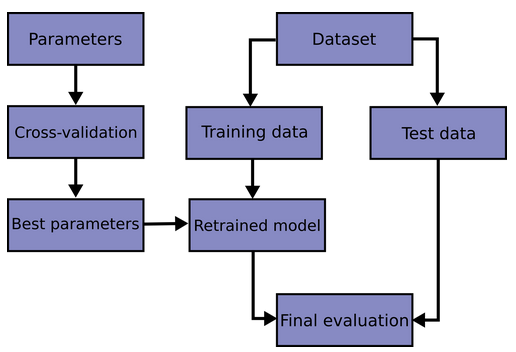







Sumber : https://scikit-learn.org/stable/modules/cross_validation.html

### Hold Out

Pendekatan evaluasi hold out adalah kita hanya memotong data sekali sehingga kita memiliki data train untuk melatih model dan data validasi untuk menilai performa model. Proporsi yang umum digunakan adalah 80:20, namun itu kembali pada total data yang kita punya.

Keuntungan dari Hold Out yaitu hanya melakukan satu kali proses fit/train untuk tiap alternatif model yang akan divalidasi sementara kelemahannya adalah metode ini akan menyimpulkan performa model dengan baik hanya jika distribusi data di train dataset sama dengan yang ada di validation dataset. Penggunaan pendekatan hold out baik dilakukan jika:
- dataset training memiliki jumlah baris yang sangat besar;
- butuh cepat dalam memvalidasi model; 
- baru mulai membuat initial model untuk mendapatkan nilai patokan

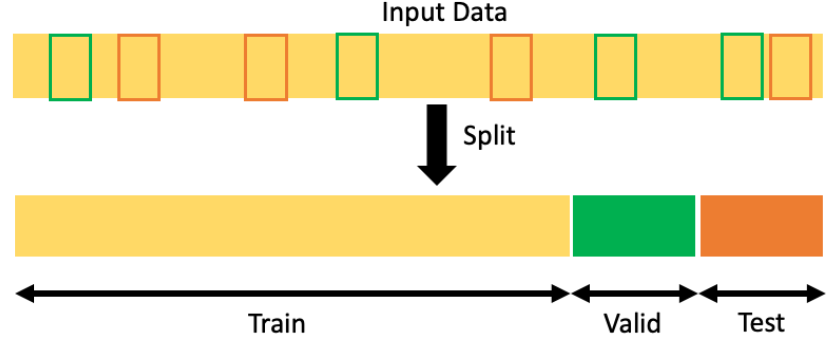

**Mengapa kita membagi data menjadi Train, Validation, dan Test?**

Kekhawatiran utama pada saat mendevelop sebuah model machine learning adalah model tidak dapat tergeneralisasi secara baik saat model digunakan untuk memprediksi data-data baru (unseen data). Kita tidak ingin model yang kita bangun memiliki performa yang baik saat dilatih namun level performa itu tidak dapat dicapai saat model dideploy untuk memprediksi data baru.

Untuk menilai generalisasi model machine learning, kita perlu membedakan antara dataset yang kita gunakan untuk melatih model machine learning dan dataset yang kita anggap unseen data baru untuk mengevaluasi performa model yang kita latih. Sehingga kita harus membagi antara dataset menjadi train dan test data: 

*   Train Dataset : sekumpulan data yang digunakan untuk melatih model machine learning kita.
*   Test Dataset : sekumpulan data yang digunakan untuk melakukan evaluasi dari model final yang sudah dilatih sebelumnya.

Agar evaluasi performa model machine learning dapat kita andalkan, kita anggap test data adalah data baru dan perlu dipisahkan sepenuhnya dari seluruh proses training sampai model selesai dibangun. Namun pada saat proses training, kita pun membutuhkan data yang terpisah dari data yang digunakan untuk training model untuk mengevaluasi performa suatu algoritma machine learning sehingga dapat dibandingkan dengan algoritma yang lainnya (refer ke isu generalisasi). Maka dari itu, data training yang sebelumnya telah disiapkan dapat dipotong kembali menjadi dataset yang kita sebut validation set. 

*   Validation Dataset : sekumpulan data yang digunakan untuk memberikan evaluasi dari model yang kita bangun saat melakukan pemilihan model dan tuning hyperparameter. Bisa juga digunakan untuk melakukan model preparation seperti feature selection.



Berapa proporsi yang ideal untuk melakukan splitting data? Hal tersebut dapat bergantung pada 2 hal yaitu :
1.   Total sampel data yang kita punya;
2.   Model yang ingin kita bangun.


Pertimbangan :
*   Beberapa model membutuhkan train dataset dalam jumlah yang cukup signifikan, maka dibutuhkan proporsi train dataset yang besar.
*   Model dengan hyperparameter yang sedikit cukup mudah untuk dilakukan tuning dan validasi, jadi kemungkinan proporsi validation dataset dapat dikurangi dan sebaliknya jika model mempunyai hyperparameter yang cukup banyak, maka validation dataset dapat ditingkatkan proporsinya.






In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(712, 18)
(712,)
(179, 18)
(179,)


Jika kita menggunakan pendekatan hold out, pembagian data validasi bersifat optional karena data test yang sudah kita pisahkan dapat digunakan untuk proses validasi model

In [ ]:
#X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state = 42)
#print (X_train.shape)
#print (X_valid.shape)

**Fast ML**

Kita bisa juga menggunakan FastML untuk membagi data dengan satu baris kode, cekidot.

In [ ]:
#X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data, target = 'Survived', 
#                                                                            train_size=0.7, 
#                                                                            valid_size=0.15, 
#                                                                            test_size=0.15)
#print(X_train.shape)
#print(X_valid.shape)
#print(X_test.shape)

**Coba Hold Out Method**

proses validasi dengan metode hold out

In [55]:
# fit model pada data training
model = LogisticRegression()
model.fit(X_train,y_train)

# hitung metric performa
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
print ("Accuracy Hold Out : ", score)

Accuracy Hold Out :  0.8044692737430168


In [53]:
# fit model pada data training
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

# hitung metric performa
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
print ("Accuracy Hold Out : ", score)

Accuracy Hold Out :  0.7821229050279329


In [66]:
# fit model pada data training
model = KNeighborsClassifier()
model.fit(X_train,y_train)

# hitung metric performa
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
print ("Accuracy Hold Out : ", score)

# model.predict_proba(X_test)

Accuracy Hold Out :  0.7150837988826816


In [52]:
models = {'LR':LogisticRegression(), 
          "DT": DecisionTreeClassifier(),
          'KNN': KNeighborsClassifier(),
          }

for name, model in models.items():
  # fit model pada data training
  model.fit(X_train,y_train)

  # hitung metric performa
  prediction = model.predict(X_test)
  score = accuracy_score(y_test, prediction)
  print ("Accuracy",name, "Hold Out : ", score)

Accuracy LR Hold Out :  0.8044692737430168
Accuracy DT Hold Out :  0.7653631284916201
Accuracy KNN Hold Out :  0.7150837988826816


### KFold Cross Validation

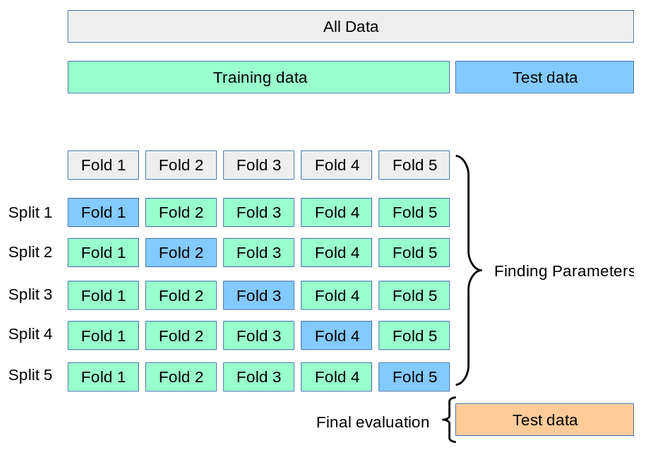

KFold cross validation akan membagi train dataset dan test dataset menjadi beberapa sample group (biasa disebut fold) dengan ukuran proporsi data yang sama lalu dilakukan iterasi untuk mentrain model dan menilai performa model hasil training. Setiap iterasi training, digunakan dataset train dan validasi yang berbeda sehingga memberikan indikasi yang lebih baik atas kemampuan model dalam bekerja pada data yang baru.

Jika dibandingkan dengan metode hold out yang bergantung pada satu kali split, indikasi performa model dengan KFold dapat lebih dipercaya karena Kfold tidak tergantung pada bagaimana data training displit menjadi data train dan data validasi. Namun, Kfold memerlukan lebih banyak computational power and time untuk dilakukan karena harus melatih model beberapa kali, dibandingkan dengan metode holdout.

In [45]:
folds = KFold(n_splits = 15, shuffle = True, random_state = 100)
scores_kfold = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=folds)
print ("Accuracy K-Fold : ", np.average(scores_kfold))

Accuracy K-Fold :  0.830112293144208


Karena hasil scorenya terdiri dari beberapa nilai, score hasil kfold kita bisa plot menjadi sebuah boxplot untuk menganalisis level performanya

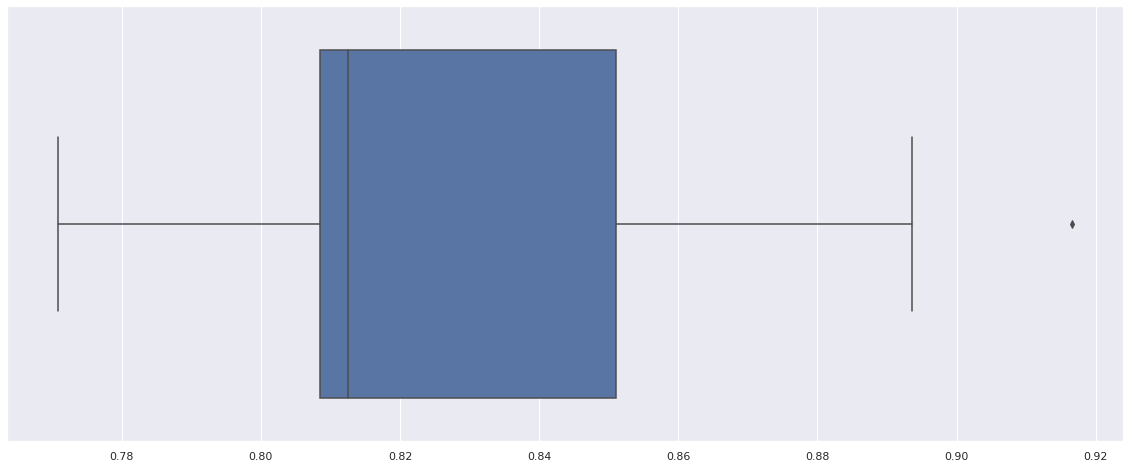

In [46]:
sns.boxplot(scores_kfold)

In [47]:
# hitung metric performa
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
print ("Accuracy Hold Out : ", score)

Accuracy Hold Out :  0.8044692737430168


### Leave One Out cross validation

Leave One Out (LOO) menggunakan salah satu bentuk Kfold yang unik karena seluruh data sebagai train dataset dan hanya menyisakan satu sampel yang dijadikan sebagai data validasi. Untuk n jumlah data, kita akan melakukan fit model sebanyak n kali. Karena dari itu, proses ini memakan run-time yang lebih lama jika dibandingkan dengan KFold namun hasil evaluasinya akan lebih robust karena data training yang digunakan lebih banyak.

In [48]:
loo = LeaveOneOut()
scores_loo = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=loo)
print ("Accuracy LOO : ", np.average(scores_loo))

Accuracy LOO :  0.8356741573033708


Untuk LOO CV, score yg dihasilkan hanya satu angka dan tidak bisa di plot dengan boxplot. Penggunaan Cross Validation akan dibahas lebih lanjut di dalam Tuning Hyperparameter.

Varible input 'scoring' pada metode KFold dan LOOCV dapat diganti sesuai dengan metric performa yang dipilih.

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

# Model Complexity

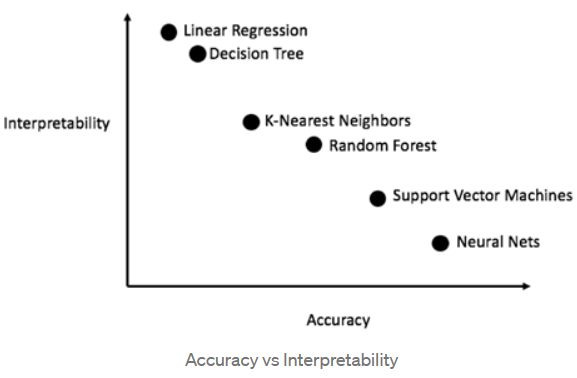

Model Complexity dapat diartikan sebagai seberapa banyak parameter yang harus dipelajari oleh model untuk dapat memprediksi target. Jumlah parameter ini tergantung pada seberapa kompleks algoritma yang digunakan dan juga seberapa banyak feature yang ada pada data training.

Model complexity juga berpengaruh terhadap interpretability model. Model-model yang kompleks dapat memiliki performa yang baik namun akan sulit jika ingin menjelaskan apa yang dilakukan didalam model untuk dapat menghasilkan prediksi.

Model yang kompleks dapat menangkap lebih banyak informasi pada data training termasuk noise yang ada pada data sehingga cenderung menjadi overfit terhadap data training tersebut. Sementara model yang sederhana kurang mampu menangkap pola pada data train sehingga terkadang menjadi underfit terhadap data training.

In [ ]:
# Penjelasan Model Complexity (dengan tuning sederhana)
list_test_score = []
list_train_score = []
range_k = range(2,41,2)
for k in range_k:
    latih_complexity = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    y_test_knn = latih_complexity.predict(X_test).reshape(-1,1)
    y_train_knn = latih_complexity.predict(X_train).reshape(-1,1)
    list_test_score.append(1-accuracy_score(y_test, y_test_knn))
    list_train_score.append(1-accuracy_score(y_train, y_train_knn))

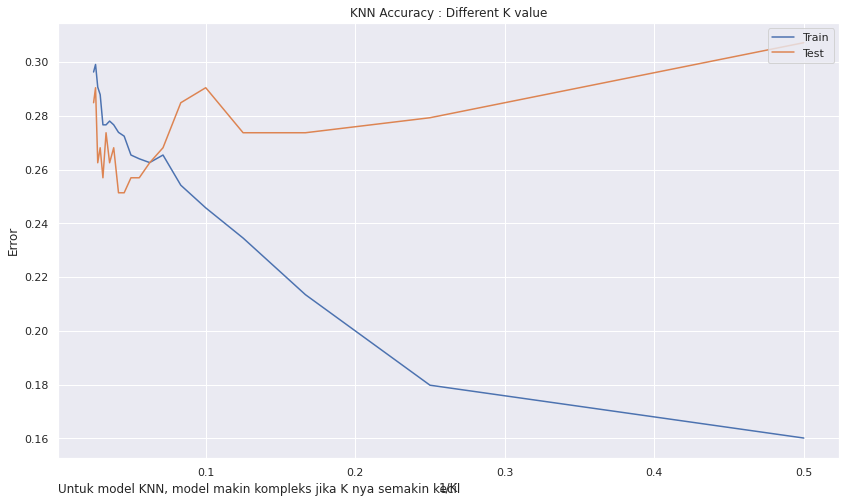

In [ ]:
scoring = []
plt.figure(figsize=(14, 8))
plt.title('KNN Accuracy : Different K value')
plt.plot([1/k for k in range_k], list_train_score, linestyle='solid', label='Train')
plt.plot ([1/k for k in range_k], list_test_score, linestyle='solid', label='Test')
plt.xlabel('1/K')
plt.ylabel('Error')
plt.annotate('Untuk model KNN, model makin kompleks jika K nya semakin kecil', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top')

plt.legend (loc='upper right', bbox_to_anchor=(1,1))
plt.show()

Semakin kompleks performa model akan makin bagus pada data training. Namun pada data test, peningkatan performa akan berhenti di suatu level kompleksitas model dan performa model akan berkurang jika model terus di buat semakin kompleks.

## Overfit, Underfit, Goodfit

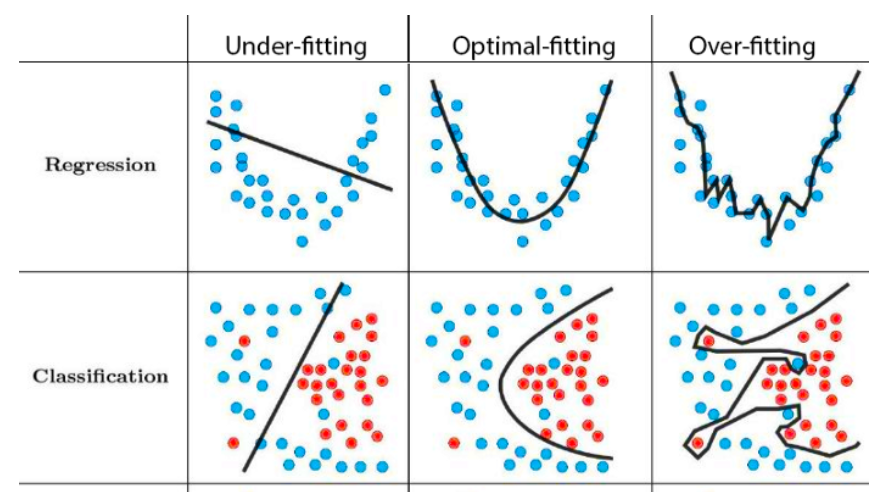

- Overfitting : Hal ini terjadi ketika model bekerja sangat baik dengan data-train namun memiliki performa kurang baik saat diberikan data-validation dan data-test, biasanya disebabkan karena model terlalu kompleks sehingga menangkap setiap data noise yang ada (**Bias** yang rendah dan **Variance** yang tinggi)
- Underfitting : Hal ini terjadi ketika model tidak dapat menangkap pola yang kompleks pada data sehingga memiliki performa yang buruk saat train , test , dan validation. Biasanya terjadi pada model yang cenderung sederhana. (**Bias** yang tinggi dan **Variance** yang rendah).

Untuk mengetahui apakah model kita underfit, overfit atau optimal fit. Kita harus memahami apa itu bias dan variance

# Bias dan Variance

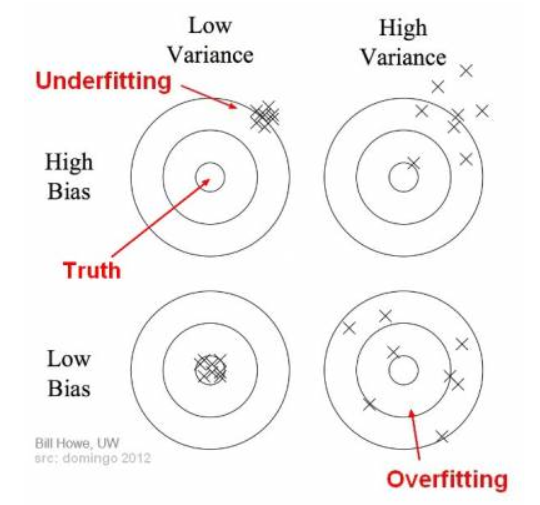

- **Bias** adalah perbedaan antara rata-rata hasil prediksi model kita dengan nilai yang sebenarnya. Model yang memiliki bias yang tinggi, sedikit belajar terhadap data latih dan ini akan membuat error yang tinggi terhadap data training dan data test.
- **Variance** merupakan variability prediksi model kita terhadap data point yang menunjukkan sebaran datanya. Model dengan variance yang tinggi, terlalu banyak belajar terhadap data latih dan kesulitan untuk bisa mengenali data yang belum pernah ia lihat. Performa modelnya bagus terhadap data latih dan error yang tinggi terhadap data test.

Melihat bias dan variance pada beberapa model classifier

In [ ]:
#Perbandingan Model
model_lr = LogisticRegression()
model_nb = GaussianNB()
model_dt = DecisionTreeClassifier()

# pendekatan cv lain nya untuk dapat melihat score validasi dan training
score_lr = cross_validate(model_lr, X_train, y_train, scoring='accuracy', cv=folds, return_train_score= True)
score_nb = cross_validate(model_nb, X_train, y_train, scoring='accuracy', cv=folds, return_train_score= True)
score_dt = cross_validate(model_dt, X_train, y_train, scoring='accuracy', cv=folds, return_train_score= True)

Membuat DataFrame Hasil Scoring dan Plotting

LR Train    0.838584
LR Test     0.830112
NB Train    0.791532
NB Test     0.787973
DT Train    0.982544
DT Test     0.775089
dtype: float64

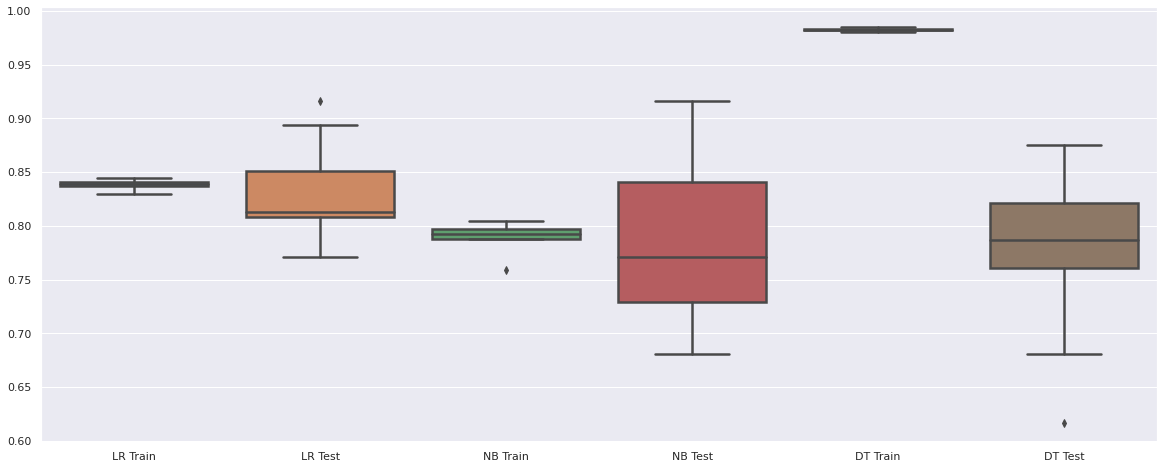

In [ ]:
column = {'LR Train': score_lr['train_score'], 'LR Test': score_lr['test_score'],
          'NB Train': score_nb['train_score'], 'NB Test': score_nb['test_score'],
          'DT Train': score_dt['train_score'], 'DT Test': score_dt['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

Dari boxplot diatas dapat dilihat bahwa model logistic regression dan naive bayes memiliki performa yang sama jika dinilai menggunakan data train dan data validasi sehingga tidak telihat tanda overfitting. Sedangkan model decision tree memiliki performa sangat baik pada data training namun berbeda dengan performa testingnya. Sehingga model decision tree bisa disimpulkan mengalami overfitting terhadap data train.

Tapi, model naive bayes memiliki score yang lebih rendah dari logistic regression karena model naive bayes merupakan model yang lebih simple dibandingkan dengan model logistic regression. Sedangkan, model decision tree merupakan model yang lebih kompleks dibandingkan dengan logistic regression, sehingga terjadi overfitting terhadap data training

Linear machine learning model yang merupakan model yang kompleksitasnya rendah, biasanya memiliki bias yang tinggi namun variance-nya rendah, sementara Nonlinear machine learning algorithms yang merupakan model kompleks biasanya memiliki bias yang rendah namun variance-nya tinggi

# Model Tuning

## Bias and Variance Tradeoff

Dalam machine learning, terdapat error yang di hasilkan dari model dapat didefinisikan seperti berikut :
 
**Err(x) = Bias2 + Variance + Irreducable error**

Irreducable error merupakan error yang tidak bisa dikurangi dengan membuat model yang baik. Biasanya error ini merepresentasikan jumlah noise dari data kita yang tidak bisa ditangkap informasinya oleh model.

Untuk mendapatkan model yang performanya cukup baik maka model machine learning perlu ditune agar mendapat kompleksitas model yang optimal untuk mendapatkan keseimbangan antara Bias dan Variance sehingga dapat diminimalisir error atas prediksi modelnya.

Jika model dibuat lebih kompleks, bias error akan semakin rendah namun variance error akan meningkat. Perubahan ini efektif dilakukan jika kita mendapat model machine learning yang masih underfit. Sedangkan jika model machine learning kita terlalu overfit pada data, model dapat ditune untuk mengurangi kompleksitas model. 

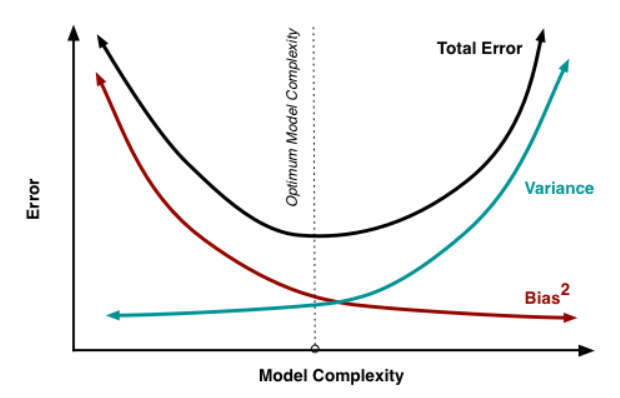

model dapat ditune dengan beberapa pendekatan sebagai berikut:
- mengganti model machine learning
- merubah data training, baik itu jumlah row maupun jumlah kolom
- tuning model dengan hyperparameter tuning
- menggabungkan beberapa model (ensemble)

## Menambahkan data baru

![dataset_effect](https://www.jeremyjordan.me/content/images/2017/07/Screen-Shot-2017-07-21-at-5.12.23-PM.png)

Efek dari menambahkan data (baik baris maupun feature) pada performa model machine learning adalah mengurangi variasi hasil prediksi model sehingga performa model yang tadinya bagus/overfit pada data training, menjadi turun namun performa generalisasi model ke data validasi akan meningkat. penambahan data dapat dilakukan dengan melakukan data collection kembali.

namun peningkatan performa yang diharapkan akan terlimitasi oleh kemampuan dari algoritma model yang dipilih
![different_ml](https://mostly.ai/wp-content/uploads/2020/08/MOSTLY-AI_Boosting-Machine-Learning-Accuracy-with-Synthetic-Data_1-1024x516.jpg)

## Feature engineering

Menambahkan feature baru dengan melakukan proses feature engineering kembali dapat mengurangi bias error pada model-model yang terdeteksi underfit. Harapannya adalah performa model meningkat namun tetap dilevel yang optimal dengan menjaga peningkatan tingkat error variance.

![feature_size](https://www.researchgate.net/profile/Mohammed-Al-Hagery/publication/333159799/figure/fig2/AS:761379707428866@1558538476263/Features-size-impact-on-the-Models-performance.ppm)

## Feature Reduction

Berkebalikan dengan penambahan data, feature reduction bertujuan untuk mengurangi informasi untuk dilatih pada model machine learning. Harapannya, performa model overfit meningkat dengan mengurangi variasi error walau menurunkan performa model pada data training.

Alternatif pendekatan untuk melakukan feature reduction:
- pendekatan statistik
- memilih feature penting sesuai hasil model
- dimentionality reduction

### Pendekatan statistik

In [ ]:
# KBest hanya memilih K-number feature yang paling bagus test statistiknya 
X_new = SelectKBest(chi2, k=4).fit_transform(X_train, y_train)
X_new.shape

#SelectPercentile memilih berapa persen top feature
# X_new = SelectPercentile(chi2, percentile= 20).fit_transform(X_train, y_train)
# X_new.shape

# For regression: f_regression, mutual_info_regression
# For classification: chi2, f_classif, mutual_info_classif

(712, 4)

DT Train    0.917235
DT Test     0.806235
dtype: float64

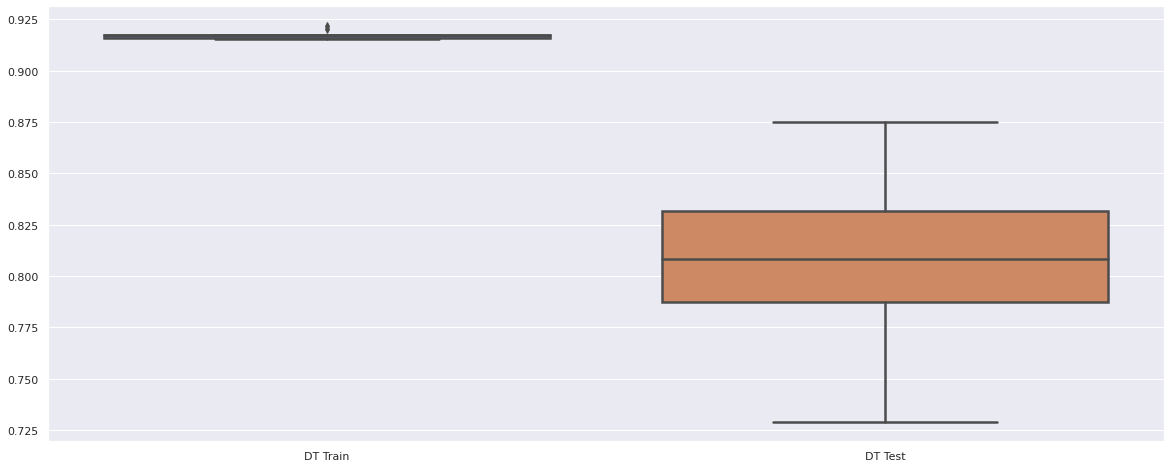

In [ ]:
# Coba data baru
score_dt = cross_validate(model_dt, X_new, y_train, scoring='accuracy', cv=folds, return_train_score= True)
column = {'DT Train': score_dt['train_score'], 'DT Test': score_dt['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

### Pendekatan model

In [ ]:
model_fit = model_dt.fit(X_train, y_train)
feature_select = SelectFromModel(model_fit, prefit=True)
X_new = feature_select.transform(X_train)
X_new.shape

(712, 4)

DT Train    0.979835
DT Test     0.764066
dtype: float64

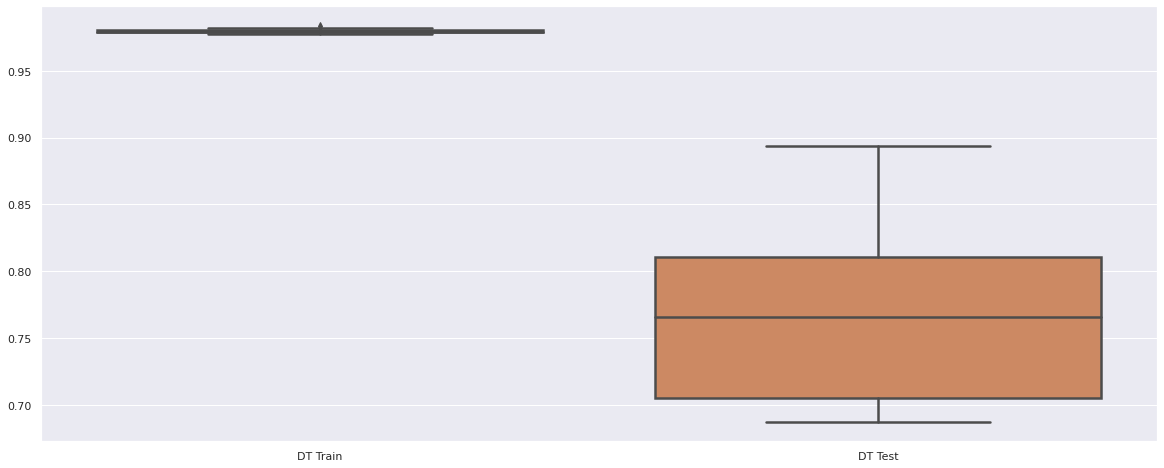

In [ ]:
# Coba data baru
score_dt = cross_validate(model_dt, X_new, y_train, scoring='accuracy', cv=folds, return_train_score= True)
column = {'DT Train': score_dt['train_score'], 'DT Test': score_dt['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

pada model-model linear, dapat digunakan L1 Regularization untuk memfilter feature-feature yang tidak berpengaruh terhadap performa model

pada model-model tree-based, dapat digunakan function 'feature_importance' untuk melihat tingkat pengaruh feature terhadap performa model.

### Dimentionality Reduction (PCA)

Principal component analysis (PCA) ada adalah salah satu pendekatan untuk melakukan dimentionality reduction. Dengan PCA, seluruh variable di proses untuk didapatkan beberapa principal components dan menggunakan sebagai dari komponen itu sebagai data baru. Principal components tersebut diurutkan berdasarkan seberapa besar sebuah komponen menangkap variasi dari keseluruhan data. Jadi, biasanya hanya beberapa dari komponen tersebut yang digunakan dan sisanya akan diabaikan.

Untuk kebutuhan EDA, biasanya hanya 2 atau 3 komponen yang paling banyak menangkap variance dari data yang diambil dan kemudian digunakan untuk visualisasi. Sedangkan untuk kebutuhan tuning model, PCA digunakan untuk mengurangi jumlah feature dengan tetap mempertahankan informasi pada keseluruhan data.

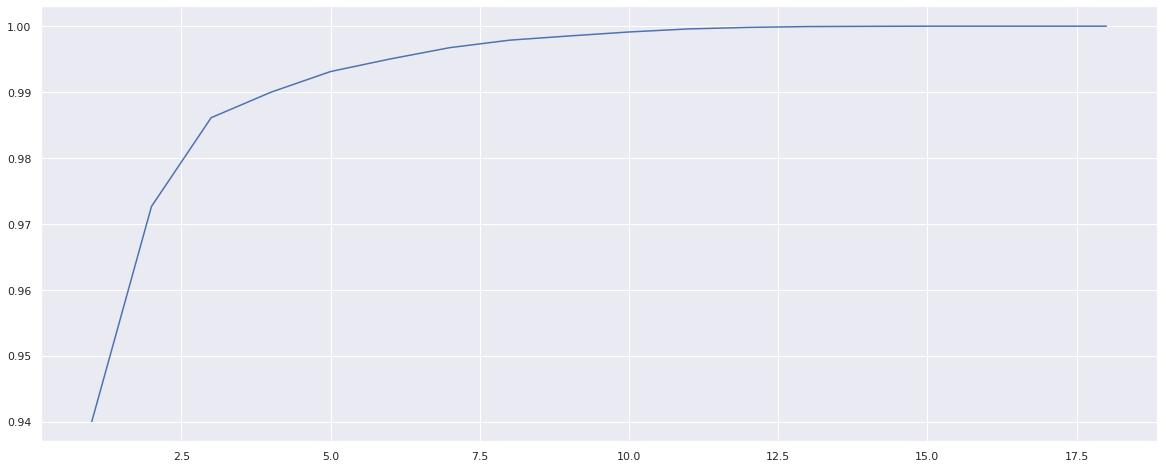

In [ ]:
# PCA sangat membutuhkan proses scaling/transforming data sebelum digunakan
norm = Normalizer()
X_norm = norm.fit_transform(X_train)

pca = PCA(n_components=18)
pca.fit(X_norm)
sns.lineplot(range(1,19),pca.explained_variance_ratio_.cumsum())

(712, 8)


DT Train    0.982544
DT Test     0.714894
dtype: float64

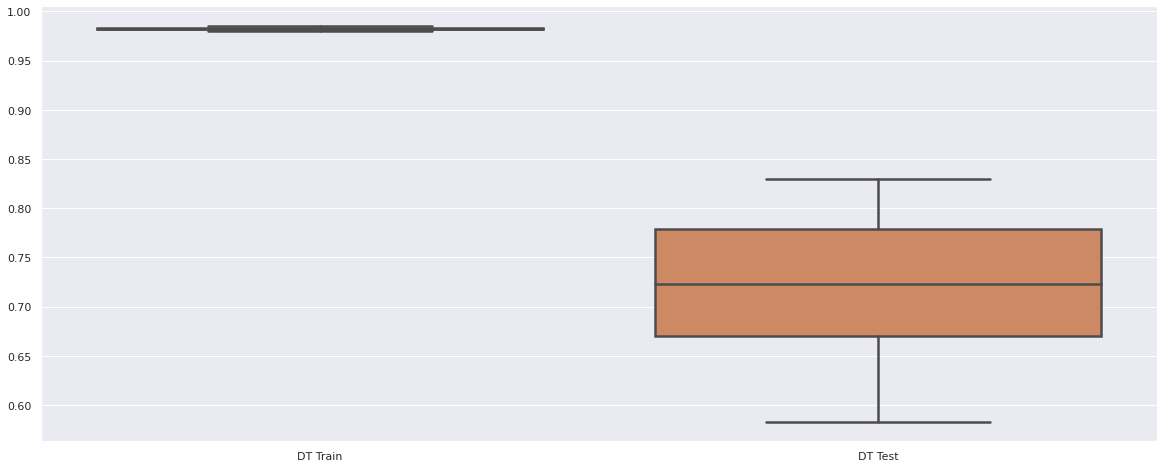

In [ ]:
pca = PCA(n_components=8)
X_new = pca.fit_transform(X_norm)
print(X_new.shape)

# Coba data baru
score_dt = cross_validate(model_dt, X_new, y_train, scoring='accuracy', cv=folds, return_train_score= True)
column = {'DT Train': score_dt['train_score'], 'DT Test': score_dt['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

**Penggunaan untuk EDA/visualisasi data**

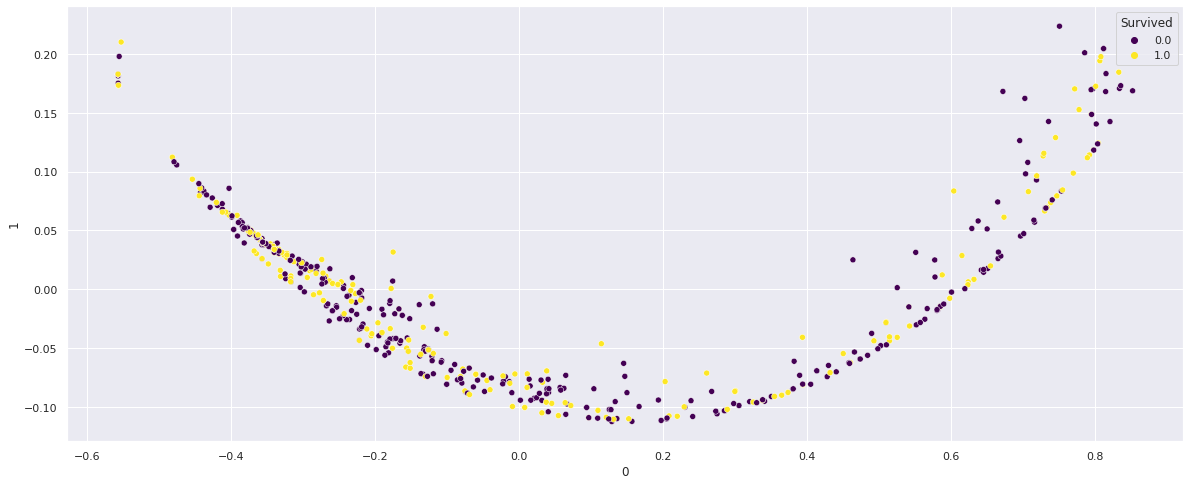

In [ ]:
pca = PCA(n_components=2)
X_new = pd.DataFrame(pca.fit_transform(X_norm))

sns.scatterplot(X_new[0],X_new[1], hue = y_train, palette='viridis')

In [ ]:
pca = PCA(n_components=3)
X_new = pd.DataFrame(pca.fit_transform(X_norm))
X_new['y'] = y_train.reset_index()['Survived']

fig = px.scatter_3d(X_new, x=0, y=1, z=2,
                    color='y',
                    title="3D Scatter Plot of PCA")
fig.update(layout_coloraxis_showscale=False)
fig.show()

## Hyperparameter Tuning

pada setiap model, terdapat parameter-parameter konfigurasi model yang biasa disebut hyperparamater selain paramatere-parameter di dalam algoritma machine learning yang akan dilatih menggunakan data training. Hyperparameter ini dapat ditentukan sebelum dimulai proses training dan tidak akan diubah selama proses training. Namun, konfigurasi ini akan mempengaruhi kompleksitas model dan pada akhirnya berpengaruh pada performa model.

Untuk membandingkan model yang memiliki hyperparameter yang berbeda, sklearn menyediakan beberapa tools diantaranya:
- GridSearchCV
jika menggunakan gridsearch, semua altenatif kombinasi parameter akan difit dan dievaluasi menggunakan cv.
misalnya jika ada 2 hyperparameter yang akan ditune yang masing-masing nya memiliki 3 alternatif value. berarti ada 9 alternatif kombinasi dan seluruhnya divalidasi dengan cv misalnya 5 folds. berarti untuk menyelesaikan gridsearch harus melatih model sebanyak 45 kali fit.

- RandomizedSearchCV
RandomizeSearchCV memiliki 1 atribute tambahan yaitu n_iter yang melimitasi berapa kombinasi alternatif hyperparameter yang akan dicoba. jika sebelumnya ada 9 alternatif dan n_iter diset = 5. Berarti hanya 5 kombinasi hyperparameter yang akan dicoba dan dinilai menggunakan cv. Pemilihan 5 kombinasi yang akan dicoba dilakukan dengan cara dirandom sampling.

Tiap jenis model, akan memiliki hyperparameter yang dapat di tune yang berbeda dengan jenis model ML lainnya. Pada kesempatan ini akan coba dibahas hyperparameter pada model-model classification berikut:
- knn
- linear model
- support vector machine
- tree based

### KNN

![knn](https://miro.medium.com/max/810/0*BMFO6QFX55-oESwy.png)
KNN adalah salah satu model non parametrik yang mudah untuk dipahami. Sebuah data yang baru akan diprediksi sesuai dengan data-data yang terdekat. Untuk menghitung jarak terdekat digunakan beberapa metric distance antara lain euclidean_distance atau manhattan_distance. Oleh karena itu, seluruh feature yang digunakan sebagai data training harus memiliki range yang mirip. Untuk itu, data trainig perlu di preprocess menggunakan scaler atau transformasi data lainnya 

![unscaled](https://i.stack.imgur.com/OCUmI.png)
https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn

KNN sering tertukar dengan algoritma Kmeans karena kedua memiliki algoritma yang menggunakan jarak antar data. Perbedaannya adalah KNN adalah model supervised learning dan K pada KNN adalah jumlah data yang terdekat dengan data baru. Sedangkan Kmeans adalah model unsupervised learning khususnya clustering dan K pada Kmeans adalah jumlah cluster yang dihasilkan.

**Tuning KNN**

satu-satunya hyperparameter yang dapat ditune pada model ini adalah nilai dari **n_neighbors** atau k. Semakin tinggi nilai k nya, model akan semakin simple karena perbedaan hasil prediksi akan semakin kecil. sedangkan nilai k yang kecil akan menghasilkan decision boundary yang tidak stabil sehingga model terlalu kompleks

hyperparameter yang mungkin dapat dicoba diubah antara lain **weight** dan **p**. weight dapat diubah antara default 'uniform' atau 'distance'(saat voting, data yang paling dekat akan sangat mempengaruhi hasil voting). p diubah untuk memilih apakah euclidean distance (p=2) atau manhattan_distance (p=1) yang digunakan menghitung distance.

In [ ]:
norm = Normalizer()
X_norm = norm.fit_transform(X_train)

In [ ]:
param_grid = {"n_neighbors": range(1,20)}

model_knn = KNeighborsClassifier()

# verbose hanya setting untuk melaporkan proses grid
grid_tune = GridSearchCV(model_knn, param_grid, cv=10, verbose = 1, return_train_score=True)
grid_tune.fit(X_norm, y_train)

print('best_param: ',grid_tune.best_params_,'\n',
      'best_score: ',grid_tune.best_score_
     )

Fitting 10 folds for each of 19 candidates, totalling 190 fits
best_param:  {'n_neighbors': 3} 
 best_score:  0.7640453834115806


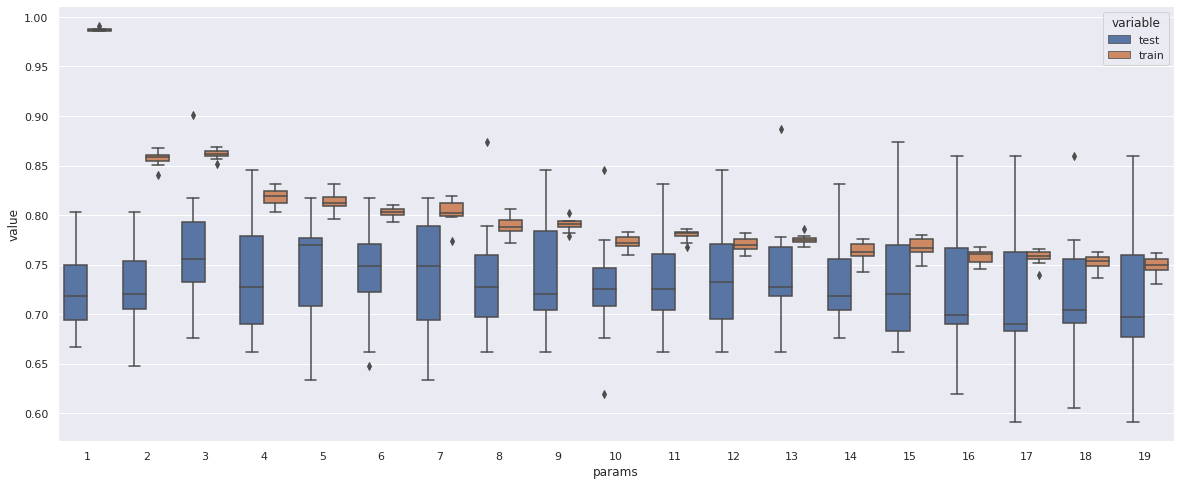

In [ ]:
result = grid_tune.cv_results_
grid_result = {"params":[d['n_neighbors'] for d in grid_tune.cv_results_['params']]}
for key, value in result.items():
    if key.find('split') >= 0 :
        grid_result[key] = value
    

grids = pd.DataFrame(grid_result).melt(id_vars='params')
grids['variable'] = grids.variable.str[7:-6]
sns.boxplot(data=grids, x='params', y='value', hue='variable')

### Linear model

Model klassifikasi pada model linear ini menggunakan basis function yang sama dengan linear regression.

$$ Y_1 = w_0 + w_1\phi(x_1) + w_2\phi(x_2) ...$$

bedanya adalah untuk kasus klasifikasi basis function ini ditambahkan dengan activation function. contohnya, logistic regression menggunakan sigmoid sebagai activation function nya. activation function ini merubah hasil $Y$ menjadi range tertentu (sigmoid = 0-1)

![logress](https://miro.medium.com/max/1050/1*Ubge8qVlc4Xk58H1oMp4Zw.jpeg)

![decision](https://miro.medium.com/max/759/1*i_oYgWjPbXbg3Z2uQLAmtw.png)

bentuk lain model linear ini dapat dilihat di model Perceptron yang merupakan dasar pengembangan model neural network
![perceptron](https://miro.medium.com/max/1050/1*n6sJ4yZQzwKL9wnF5wnVNg.png)

**Tuning Linear Model**

Model linear dapat di tune dengan menambahkan regularization term pada basis function linear nya. Term tambahan yang biasa digunakan adalah:
- absolut dari weight (L1 / Lasso)
- pangkat 2 dari weight (L2 / Ridge)
- kombinasi L1 dan L2 (elastic net)

Untuk lasso, pinalti terhadap weight tiap feature bisa menarik weight nya hingga menjadi 0. Sehingga, lasso dapat digunakan untuk memilih feature-feature yang penting (yang kurang penting akan mendapatkan weight yang sangat rendah)


![regularization](https://neuraspike.com/wp-content/uploads/2020/10/l2-regularization-with-python-thumbnail.gif "test")

regularization akan menambahkan pinalti pada tiap weight sehingga akan menghasilkan model yang lebih simple. besarnya pinalti yang diberikan adalah sebesar $\lambda$ pada term regularization nya. Sehingga nilai $\lambda$ ini merupakan hyperparameter pada model linear dan dapat di tune untuk mengubah model complexity nya.

Namun, beberapa linear model pada package sklearn memiliki nama hyperparameter berbeda walaupun maksudnya sama ($\lambda$)
- pada model logistic regression, ada hyperparameter C yang merupakan inverse dari $\lambda$  ($1/\lambda$). Jadi semakin kecil nilai C, kekuatan regularisasi akan semakin besar dan model akan semakin simple.
- pada model perceptron, ada hyperparameter '**alpha**' untuk menentukan kekuatan regularisasi, semakin besar nilai '**alpha**' semakin simple model

Selain kekuatan regularisasi, dapat juga model di tune dengan mengganti jenis regularisasinya, namun hasilnya biasanya tidak jauh berbeda.

In [ ]:
param_grid = {"C":[10**i for i in range(-5,6)]}

# verbose hanya setting untuk melaporkan proses grid
grid_tune = GridSearchCV(model_lr,param_grid, cv=10, verbose = 1, return_train_score=True)
grid_tune.fit(X_train, y_train)

print('best_param: ',grid_tune.best_params_,'\n',
      'best_score: ',grid_tune.best_score_
     )

Fitting 10 folds for each of 11 candidates, totalling 110 fits


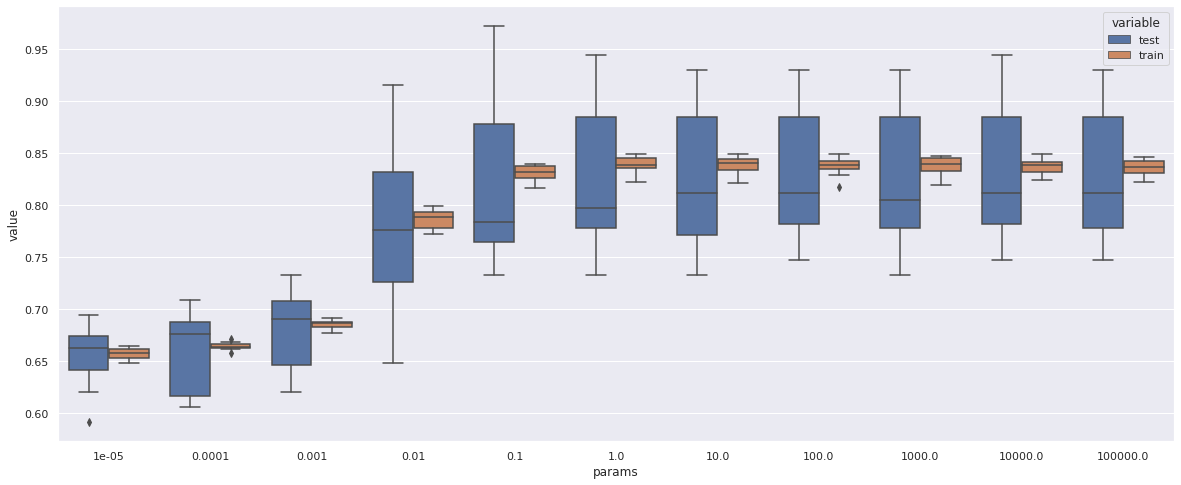

In [ ]:
result = grid_tune.cv_results_
grid_result = {"params":[d['C'] for d in grid_tune.cv_results_['params']]}
for key, value in result.items():
    if key.find('split') >= 0 :
        grid_result[key] = value
    

grids = pd.DataFrame(grid_result).melt(id_vars='params')
grids['variable'] = grids.variable.str[7:-6]
sns.boxplot(data=grids, x='params', y='value', hue='variable')

pendekatan lain grid search jika hanya memiliki 1 hyperparameter yang akan di tune

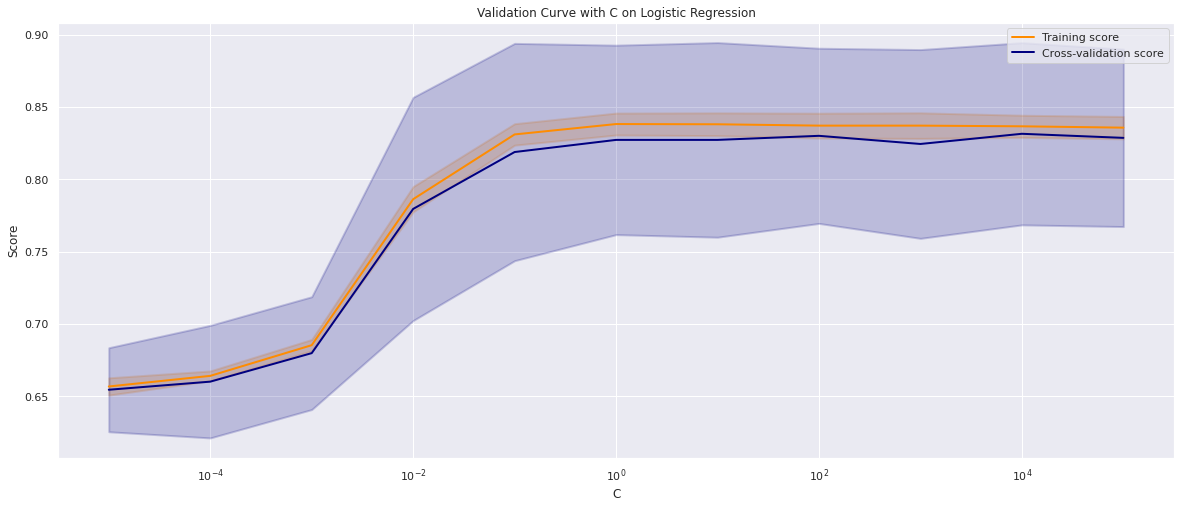

In [ ]:
train_scores, test_scores = validation_curve(model_lr, X_train, y_train, param_name = "C", param_range = param_grid['C'], cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with C on Logistic Regression")
plt.xlabel("C")
plt.ylabel("Score")
lw = 2

plt.semilogx(param_grid['C'], train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_grid['C'], train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_grid['C'], test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_grid['C'], test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
plt.show()

### Support Vector Machine

![svm](https://media-exp1.licdn.com/dms/image/C5112AQEQm17bJ2qOiA/article-cover_image-shrink_423_752/0/1523527491043?e=1634169600&v=beta&t=0kKYwu3qwH1orFNYu2X87ybuFWqldjoXISQ6H5180s8)

Cara kerja SVM untuk clasifikasi adalah dengan menentukan decision boundary (hyperplane) atas data sehingga menghasilkan jarak (margin/support) paling maksimal antara kategori-kategori yang akan di prediksi. Model ini bekerja dengan geometric property dari data bukan menggunakan pendekatan statistikal.

**Tuning SVM**

Kelebihan SVM adalah adanya trick kernel yang dapat digunakan untuk merubah bentuk decision boundary. Dan **kernel** ini adalah hyperparameter utama yang dapat di tune pada model SVM ini. Dengan mengubah kernel, cara kerja didalam model akan sangat berubah.

https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py

Hyperparameter yang berikutnya dapat di tune ada **C**. Sama dengan model-model linear, C ini mengubah kekuatan regularisasi model. Namun efeknya agak sedikit berbeda, pada SVM, perubahan C akan terlihat dari sebanyak apa toleransi model pada data-data disekitar hyperplane. Semakin besar nilai C, maka akan semakin sedikit data yang ada antara support/margin (margin makin kecil).

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py

Satu Hyperparameter yang dapat ditune adalah **gamma**, namun 'gamma' ini hanya akan bekerja pada kernel non linear ('rbf', 'poly', 'sigmoid'). Efeknya adalah semakin tinggi gamma, model akan semakin kompleks dan radius atas hyperplane akan semakin kecil. kebalikannya, jika gamma semakin kecil, model akan semakin simple

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py

In [ ]:
radian_svm = SVC(kernel='rbf')
param_grid = {"gamma": [10**i for i in range(-5,6)]}

# verbose hanya setting untuk melaporkan proses grid
grid_tune = GridSearchCV(radian_svm,param_grid,cv=10, verbose = 1, return_train_score=True)
grid_tune.fit(X_train, y_train)

print('best_param: ',grid_tune.best_params_,'\n',
      'best_score: ',grid_tune.best_score_
     )

Fitting 10 folds for each of 11 candidates, totalling 110 fits
best_param:  {'gamma': 0.1} 
 best_score:  0.7149256651017215


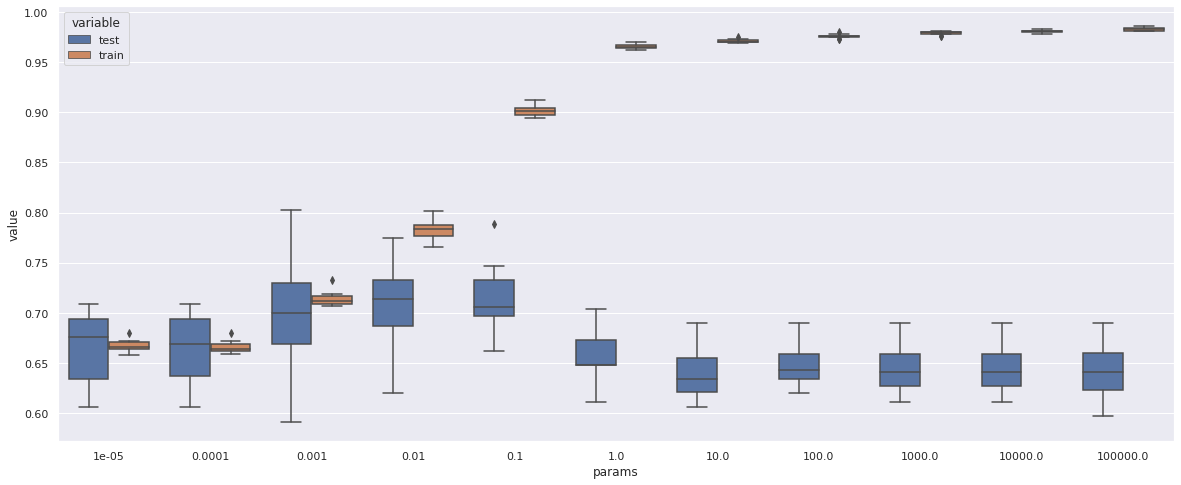

In [ ]:
result = grid_tune.cv_results_
grid_result = {"params":[d['gamma'] for d in grid_tune.cv_results_['params']]}
for key, value in result.items():
    if key.find('split') >= 0 :
        grid_result[key] = value
    

grids = pd.DataFrame(grid_result).melt(id_vars='params')
grids['variable'] = grids.variable.str[7:-6]
sns.boxplot(data=grids, x='params', y='value', hue='variable')

### Tree-Based

![tree](https://miro.medium.com/max/2000/1*jojTznh4HOX_8cGw_04ODA.png)

Model machine learning ini berisi aturan-aturan untuk memutuskan bagaimana data dipisahkan sehingga akhirnya dapat dihasilkan prediksi baik itu regresi maupun klasifikasi. Model decision Tree merupakan model yang cukup populer karena beberapa hal:
- model sangat mudah untuk dintepretasi dan dijelaskan
- dapat menggunakan data dalam bentuk categorical dan numerical untuk training
- dapat digunakan untuk kasus regresi dan klasifikasi
- performa nya masih dapat di tingkatkan dengan menggunakan data yang besar

kelemahan model ini adalah:
- sangat mudah overfit, sangat sensitif terhadap noise pada data
- butuh waktu lebih untuk tuning
- tidak support transfer learning

**Tuning Decision Tree**

Seperti dijelaskan diatas, model tree based sangat sensitif terhadap noise dan outlier sehingga lebih mudah untuk overfit. Sehingga itu perlu strategy untuk mengurangi kemungkinan overfit itu. Model ini juga dikenal memiliki banyak sekali hyperparameter yang dapat ditune. Untuk dapat memahaminya, hyperparameter tersebut dapat dibagi 2 sesuai dengan pendekatan yang dihasilkan:

- Stopping criteria

Hyperparameter yang ada dikelompok ini diset agar algoritma decision tree berhenti membuat cabang baru agar tidak terlalu overfit. Terdapat 3 hyperparameter yang dapat ditune pada pendekatan ini antara lain:
1. **max_depth**

max_depth dimaksudkan untuk menentukan sedalam apa cabang pada decision tree dapat dibuat. Cabang yang terlalu dalam akan membuat model lebih kompleks dan overfit, sedangkan cabang terlalu rendah akan membuat model underfit

2. **min_samples_split**

Hyperparameter ini menentukan berapa data/sample minimal pada sebuah node yang dapat dicabangkan lagi menjadi level dibawahnya. Semakin besar value pada hyperparameter ini, semakin sulit model untuk melakukan split sehingga model akan semakin simple. Nilai paling ideal min_samples_split biasanya ada diantara 2 dan 40.

3. **min_samples_leaf**

min_samples_leaf adalah jumlah sample minimum sebuah node dapat menjadi sebuah leaf. hyperparameter berhubungan dengan min_samples_split karena min_samples_leaf dilihat saat min_samples_split terpenuhi. Semakin besar value pada hyperparameter ini, semakin sulit model untuk melakukan split sehingga model akan semakin simple. Nilai ideal min_samples_leaf biasanya ada diantara 1 dan 20.

- Pruning

Hyperparameter pada kelompok ini akan mengurangi leaf yang telah dihasilkan sebelumnya sehingga model akan lebih sederhana dan terhindar dari overfit.

1. **min_weight_fraction_leaf**

Hyperparameter ini digunakan untuk mengurangi leaf yang jumlah sample weight didalamnya kurang dari yang ditetapkan. sample_weight dapat diset untuk mengurangi efek data imbalance, jika tidak diset, tiap class target akan memiliki weight yang sama. Karena bergantung dari weight tiap kelas sample, hyperparameter ini akan lebih bias kepada class yang dominan.

2. **min_impurity_decrease**

Tiap split diharapkan membuat data lebih mudah untuk dikelompokan, sehingga split-split yang efek mengurangi impurity data kurang dari value yang diset di hyperparameter ini akan dihilangkan.



**Coba tuning max_depth**

In [ ]:
param_grid = {"max_depth": range(1,20)}

# verbose hanya setting untuk melaporkan proses grid
grid_tune = GridSearchCV(model_dt, param_grid,cv=10, verbose = 1, return_train_score=True)
grid_tune.fit(X_train, y_train)

print('best_param: ',grid_tune.best_params_,'\n',
      'best_score: ',grid_tune.best_score_
     )

Fitting 10 folds for each of 19 candidates, totalling 190 fits
best_param:  {'max_depth': 3} 
 best_score:  0.8342723004694836


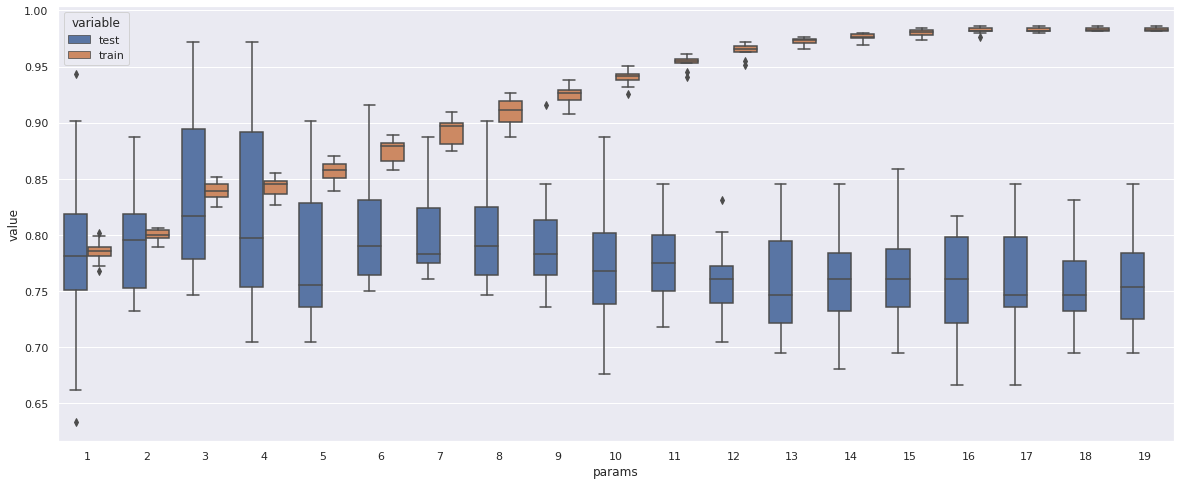

In [ ]:
result = grid_tune.cv_results_
grid_result = {"params":[d['max_depth'] for d in grid_tune.cv_results_['params']]}
for key, value in result.items():
    if key.find('split') >= 0 :
        grid_result[key] = value
    

grids = pd.DataFrame(grid_result).melt(id_vars='params')
grids['variable'] = grids.variable.str[7:-6]
sns.boxplot(data=grids, x='params', y='value', hue='variable')

**Coba tune min_samples_split dan min_samples_leaf**

In [ ]:
param_grid = {"min_samples_split": range(2,21,5),
              "min_samples_leaf": range(1,20,5),
             }

model_dt = DecisionTreeClassifier()

# verbose hanya setting untuk melaporkan proses grid
grid_tune = GridSearchCV(model_dt, param_grid,cv=10, verbose = 1, return_train_score=True)
grid_tune.fit(X_train, y_train)

print('best_param: ',grid_tune.best_params_,'\n',
      'best_score: ',grid_tune.best_score_
     )

Fitting 10 folds for each of 16 candidates, totalling 160 fits
best_param:  {'min_samples_leaf': 16, 'min_samples_split': 2} 
 best_score:  0.8160015649452269


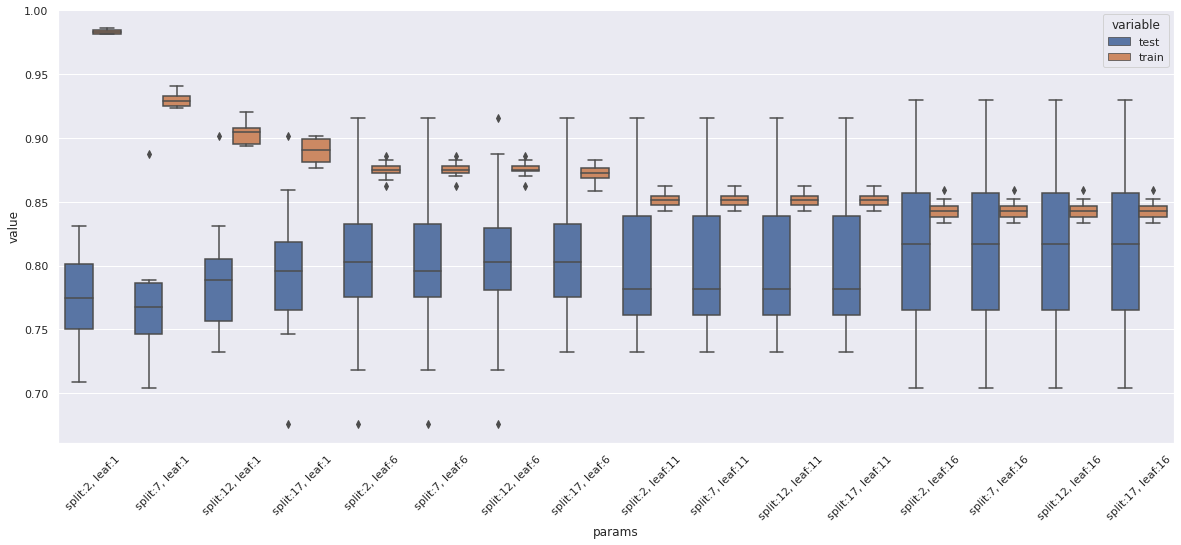

In [ ]:
result = grid_tune.cv_results_
grid_result = {"params":['split:'+str(d['min_samples_split'])+', leaf:'+str(d['min_samples_leaf'])
                         for d in grid_tune.cv_results_['params']]}
for key, value in result.items():
    if key.find('split') >= 0 and key.find('min') < 0:
        grid_result[key] = value
    

grids = pd.DataFrame(grid_result).melt(id_vars='params')
grids['variable'] = grids.variable.str[7:-6]
sns.boxplot(data=grids, x='params', y='value', hue='variable')
plt.xticks(rotation=45)
plt.show()

## Ensemble

![ensemble](https://miro.medium.com/max/1050/1*22Ukd9hgt1rOV6k0RXwOBA.png)

Ensemble adalah pendekatan untuk meningkatkan performa model dengan menggabungkan beberapa model lain di dalam proses prediksinya. Pendekatan ini dapat menjadi solusi atas beberapa masalah yang ditemukan jika hanya menggunakan satu model prediksi:
- High variance: Model dapat sangat sensitif terhadap data training yang diberikan untuk fitur yang dipelajari.
- Low accuracy: Performa satu model yang di train dengan seluruh data training mungkin tidak cukup baik untuk memenuhi harapan.
- Features noise and bias: Model dapat tergantung hanya pada satu atau beberapa feature untuk memprediksi, sehingga dengan menambahkan model lain diharapkan dapat menangkap informasi dari feature lain.

Syarat utama agar metode ensemble dapat meningkatkan performa model-model didalamnya adalah setiap prediksi model harus tidak memiliki korelasi antar satu dengan yang lain. Beberapa algoritma yang dapat digunakan untuk melakukan ensemble antara lain:

### Bagging

![bagging](https://miro.medium.com/max/1050/1*-PXzSlXtFEGTxgcmCyMkjQ.png)

Bagging dilakukan dengan menggunakan teknik sampling bootstraping. Bootstraping membuat beberapa set data dari data training dengan replacement. Tiap subset akan memiliki jumlah data yang sama dan digunakan untuk melatih base model secara paralel.

Salah satu contoh penerapan bagging adalah model **Random Forest**. Random forest membuat subset bukan hanya dengan sampling sample tapi juga features yang akan digunakan untuk melatih beberapa model decision tree. Pembuatan subset secara random ini memastikan tidak ada korelasi antara hasil prediksi satu tree dengan yg lain.

RF Train    0.982833
RF Test     0.793603
dtype: float64

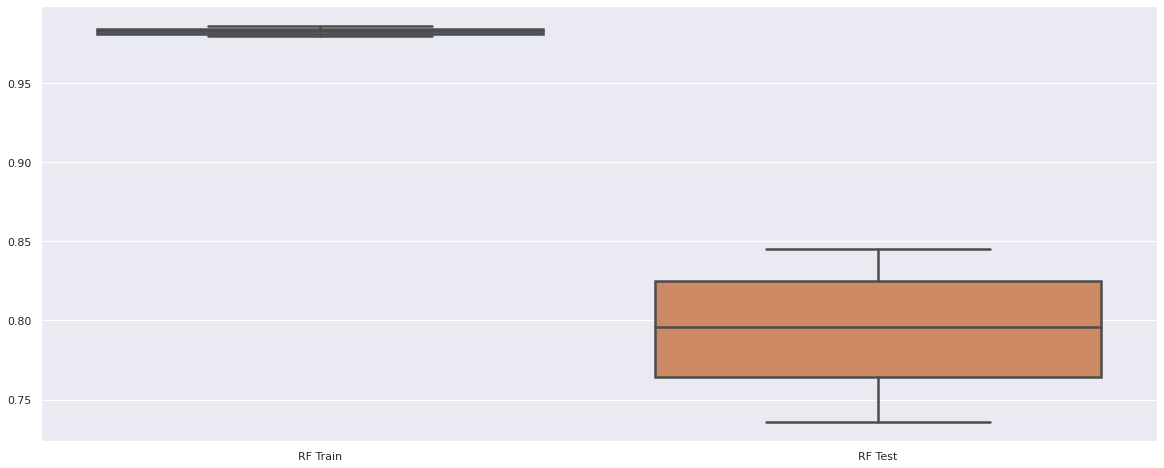

In [ ]:
model_rf = RandomForestClassifier()
score_rf = cross_validate(model_rf, X_train, y_train, scoring='accuracy', cv=10, return_train_score= True)
column = {'RF Train': score_rf['train_score'], 'RF Test': score_rf['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

Hyperparameter tuning model random forest cukup mirip dengan tuning model decision tree. Hanya ada satu tambahan hyperparameter yang dapat ditune yaitu **n_estimators** yang merupakan jumlah tree yang akan dibuat didalam model randomforest. jumlah tree yang semakin besar akan mengurangi variance sehingga dapat mengurangi kompleksitas model. Namun jumlah tree yang terlalu besar akan menambah besar file model untuk dideploy dan mengurangi kecepatan prediksi.

**Coba Tune RandomForest**

In [ ]:
param_grid = {"n_estimators": range(50,301,50)}

# verbose hanya setting untuk melaporkan proses grid
grid_tune = GridSearchCV(model_rf, param_grid,cv=10, verbose = 1, return_train_score=True)
grid_tune.fit(X_train, y_train)

print('best_param: ',grid_tune.best_params_,'\n',
      'best_score: ',grid_tune.best_score_
     )

Fitting 10 folds for each of 6 candidates, totalling 60 fits
best_param:  {'n_estimators': 300} 
 best_score:  0.7949530516431925


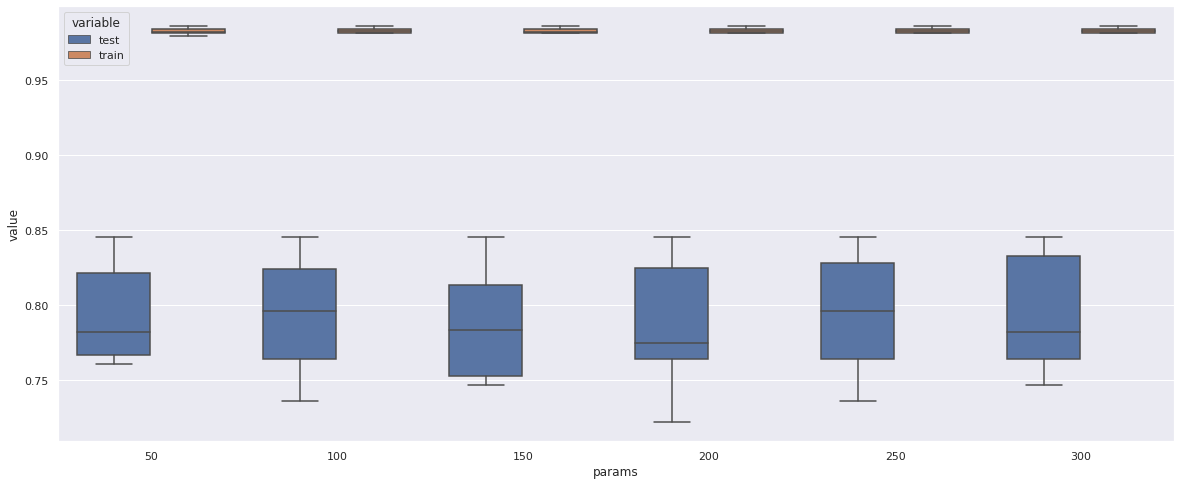

In [ ]:
result = grid_tune.cv_results_
grid_result = {"params":[d['n_estimators'] for d in grid_tune.cv_results_['params']]}
for key, value in result.items():
    if key.find('split') >= 0 :
        grid_result[key] = value
    

grids = pd.DataFrame(grid_result).melt(id_vars='params')
grids['variable'] = grids.variable.str[7:-6]
sns.boxplot(data=grids, x='params', y='value', hue='variable')

**Menggunakan Hyperparameter DT**

RF Train    0.818038
RF Test     0.811737
dtype: float64

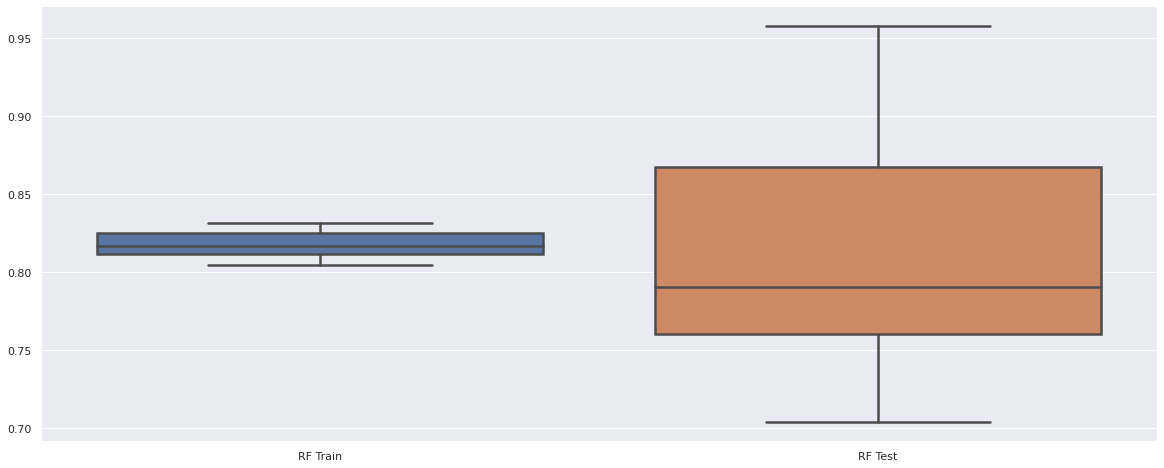

In [ ]:
model_rf = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=2, min_samples_leaf=16)
score_rf = cross_validate(model_rf, X_train, y_train, scoring='accuracy', cv=10, return_train_score= True)
column = {'RF Train': score_rf['train_score'], 'RF Test': score_rf['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

### Boosting

![boosting](https://miro.medium.com/max/1050/1*trWLNnfyqdRklFmLGcF_Zw.png)
Algoritma boosting berfokus pada penggunaan informasi error dari model sebelumnya untuk meningkatkan model di level selanjutnya. Contoh model-model yang menggunakan pendekatan boosting ini adalah AdaBoost, CatBoost, XGBoost dan LightGBM. Model-model dengan pendekatan boosting cukup populer untuk digunakan karena pemenang pada beberapa kompetisi kaggle adalah peserta yang membangun model dengan pendekatan ini.

untuk model-model boosting, sklearn hanya menyediakan adaboost, sedangkan catboost, XGBoost dan LightGBM dapat digunakan dengan menginstall package model yang bersangkutan 

**Tuning**

Untuk tuning model boosting, karena base classifiernya adalah decision tree, hyperparameter decision tree dapat digunakan untuk tuning base modelnya. Sedangkan model boosting nya memiliki minimal 2 hyperparameter yang dapat di tune:
- n_estimators
- learning_rate

untuk model adaboost pada sklearn, mungkin dapat dicoba untuk menggunakan base model lain selain tree base. sedangkan model boosting lain hanya menggunakan model decision tree sebagai base model. 

**Coba AdaBoost**

ADA Train    0.850502
ADA Test     0.807512
dtype: float64

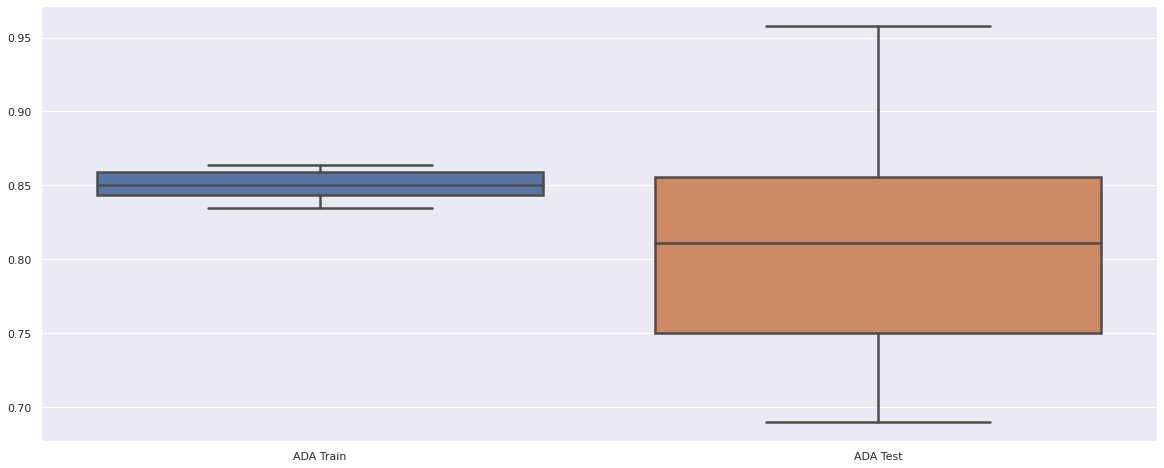

In [ ]:
model_ada = AdaBoostClassifier()
score_ada = cross_validate(model_ada, X_train, y_train, scoring='accuracy', cv=10, return_train_score= True)
column = {'ADA Train': score_ada['train_score'], 'ADA Test': score_ada['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

ADA Train    0.951154
ADA Test     0.796342
dtype: float64

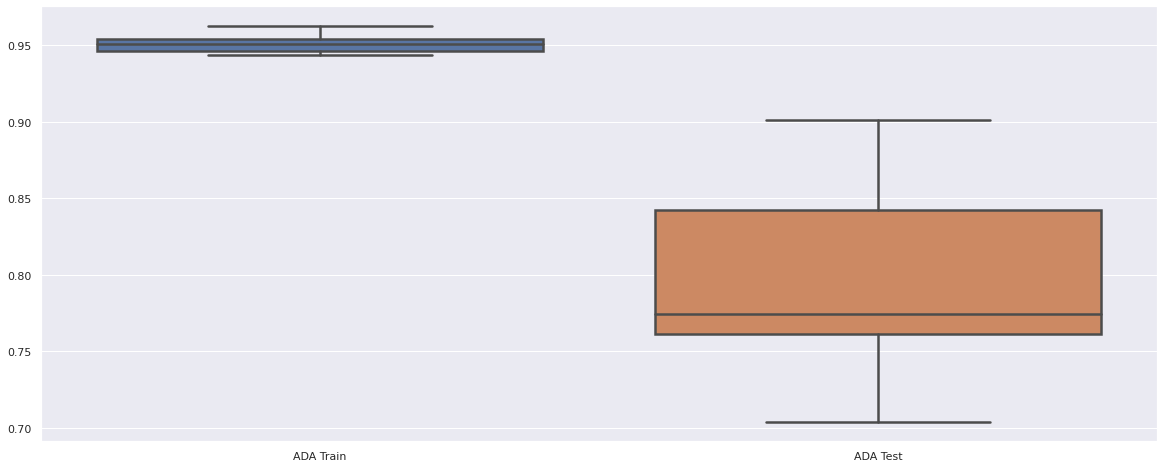

In [ ]:
model_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=16))
score_ada = cross_validate(model_ada, X_train, y_train, scoring='accuracy', cv=10, return_train_score= True)
column = {'ADA Train': score_ada['train_score'], 'ADA Test': score_ada['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

**Coba XGBoost**

XGB Train    0.889825
XGB Test     0.830027
dtype: float64

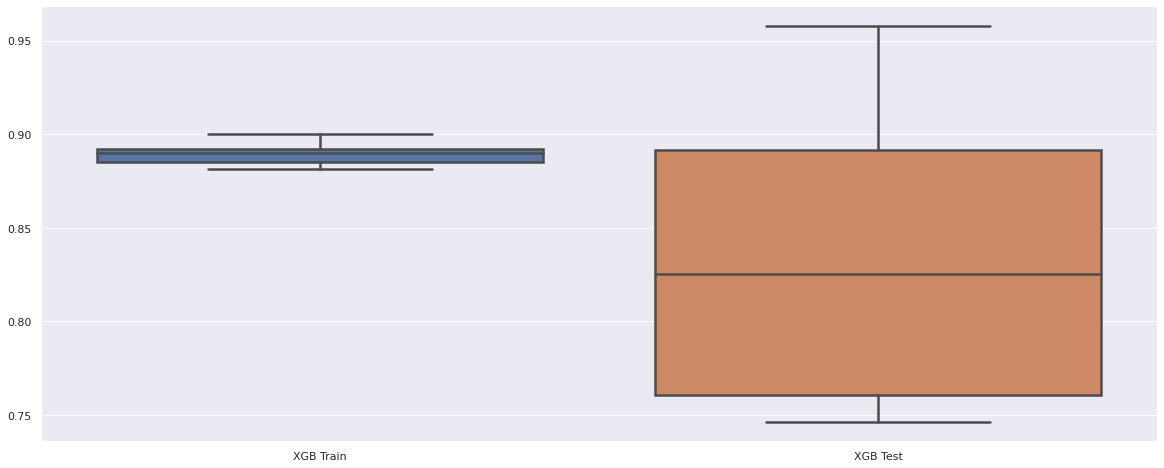

In [ ]:
model_xgb = XGBClassifier(eval_metric='logloss')
score_xgb = cross_validate(model_xgb, X_train, y_train, scoring='accuracy', cv=10, return_train_score= True)
column = {'XGB Train': score_xgb['train_score'], 'XGB Test': score_xgb['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

XGB Train    0.868133
XGB Test     0.831436
dtype: float64

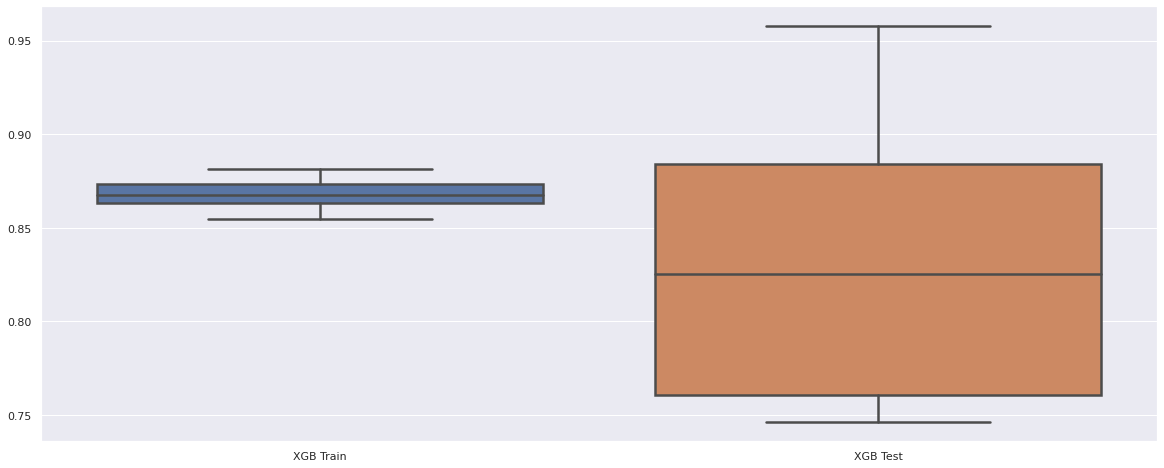

In [ ]:
model_xgb = XGBClassifier(eval_metric='logloss', max_depth=3, n_estimators=50)
score_xgb = cross_validate(model_xgb, X_train, y_train, scoring='accuracy', cv=10, return_train_score= True)
column = {'XGB Train': score_xgb['train_score'], 'XGB Test': score_xgb['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

### Stacking

![stack](https://miro.medium.com/max/1050/1*IaqmYUSmQXE8AJw7moqwkA.png)

Stacking adalah pendekatan ensemble yang menggabungkan beberapa model sebagai model level 1 dan hasil prediksi semua model level 1 akan dijadikan data training untuk model level 2. Untuk model level 2, ada beberapa pendekatan yang dapat diambil:
- voting
- weighted voting
- menggunakan model classifier

Pada beberapa kompetisi kaggle yang pemenangnya menggunakan pendekatan stacking, model-model di stack hingga level ke tiga dan menggunakan puluhan jenis classifier yang di stack dibawahnya.

![win_kaggle](https://miro.medium.com/max/1400/1*DMcjL6Hshlf6w18gqw4VmA.png)

VOTE Train    0.882491
VOTE Test     0.821596
dtype: float64

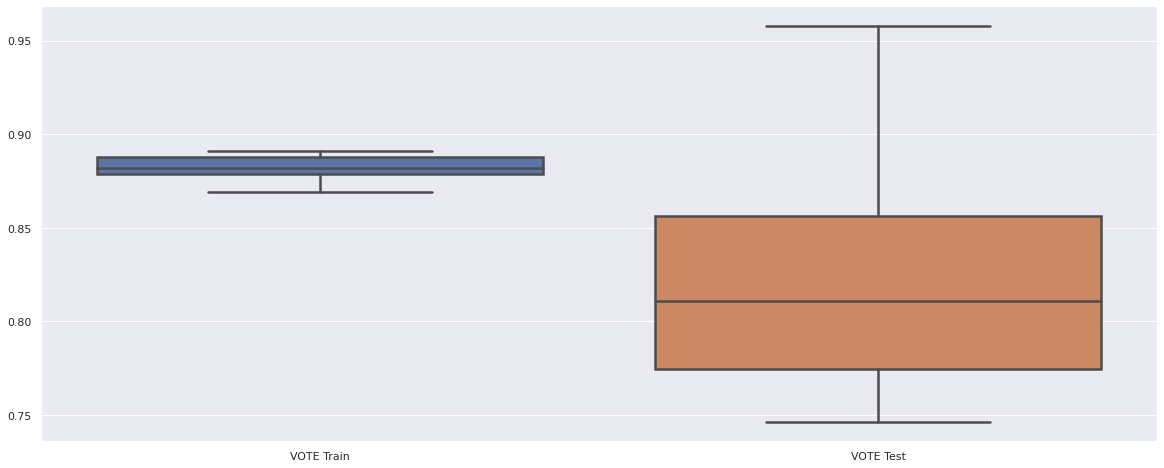

In [ ]:
# definisikan model-model yang akan di stack
models = [
    ('lr', model_lr),
    ('knn', model_knn),
    ('svm', radian_svm),
    ('nb', model_nb),
    ('dt', model_dt)]

model_voting = VotingClassifier(estimators=models)

score_vote = cross_validate(model_voting, X_train, y_train, scoring='accuracy', cv=10, return_train_score= True)
column = {'VOTE Train': score_vote['train_score'], 'VOTE Test': score_vote['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

VOTE Train    0.903714
VOTE Test     0.816021
dtype: float64

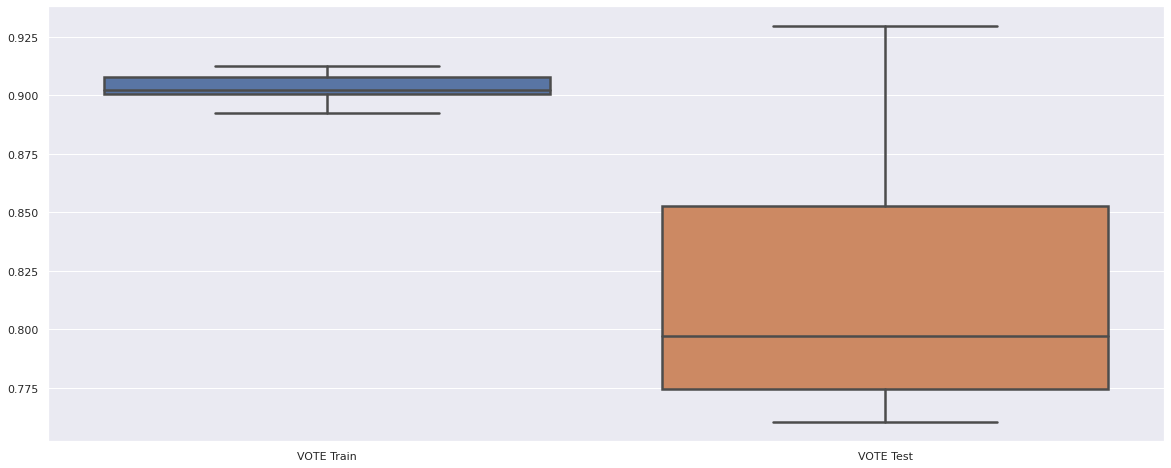

In [ ]:
# ubah weight untuk mengganti voting menjadi weighted voting
model_voting = VotingClassifier(estimators=models, weights=[0.3, 0.1, 0.3, 0.1, 0.2])

score_vote = cross_validate(model_voting, X_train, y_train, scoring='accuracy', cv=10, return_train_score= True)
column = {'VOTE Train': score_vote['train_score'], 'VOTE Test': score_vote['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

VOTE Train    0.862674
VOTE Test     0.827230
dtype: float64

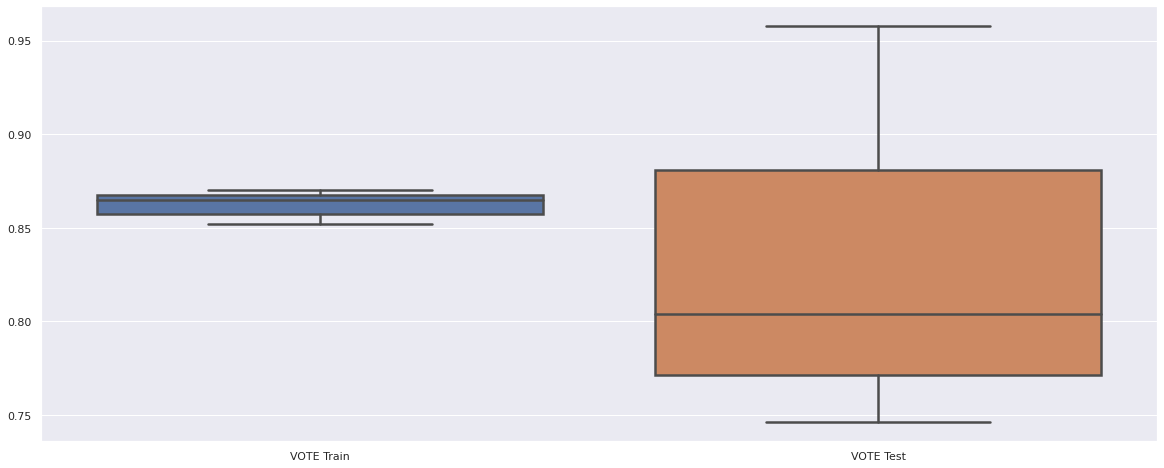

In [ ]:
# ubah weight untuk mengganti voting menjadi weighted voting
model_stack = StackingClassifier(estimators=models, final_estimator=model_lr)

score_stack = cross_validate(model_stack, X_train, y_train, scoring='accuracy', cv=10, return_train_score= True)
column = {'VOTE Train': score_stack['train_score'], 'VOTE Test': score_stack['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

![quote](https://pbs.twimg.com/media/EUUdw1yU4AAxiGg?format=jpg&name=small)

Daftar Pustaka :
- Samarth Agrawal : "How to split data into three sets (train, validation, and test) And why?",accessed on Sunday (9/8). Link : https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c
- https://socs.binus.ac.id/2020/11/01/confusion-matrix/
- https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229
- https://towardsdatascience.com/techniques-for-handling-underfitting-and-overfitting-in-machine-learning-348daa2380b9
- https://towardsdatascience.com/model-complexity-accuracy-and-interpretability-59888e69ab3d
- https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff
- https://mostly.ai/2020/08/07/boost-machine-learning-accuracy-with-synthetic-data/
- https://c3.ai/glossary/data-science/tree-based-models/
- https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
- https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c